<a href="https://colab.research.google.com/github/rahatwads/Data-Science/blob/main/Assignment2_AUTOML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AUTOML**

MIT License
Copyright (c) 2024 rahatwads
Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

ASSIGNMENT 2:

About Dataset: https://www.kaggle.com/datasets/alphiree/cardiovascular-diseases-risk-prediction-dataset

Abstract

This data file includes all needed information to find out more about heart disease, necessary metrics to make predictions and draw conclusions.
In this assignment, I utilized the H2O.ai AutoML library to develop predictive models and analyze their results. By exploring various algorithms and evaluating their performance, I identified significant relationships within the dataset. Additionally, I constructed multivariate models that consider multiple input variables to enhance predictive accuracy. Furthermore, I extended the analysis to include multi classification and analyzing the data to check the correlationship, multicollinearity, significant between variables, then use AutoML which belongs to H2O.ai to train the data and predict in different models, finally print the best model's performance.Through iterative modeling and interpretation of results, I aimed to uncover valuable insights and refine predictive modeling approaches for enhanced decision-making capabilities.

Following questions were answered for all of the models:

* Is the relationship significant?

* Are any model assumptions violated?

* Is there any multicollinearity in the model?

* In the multivariate models are predictor variables independent of all the other predictor variables?

* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

* Does the model make sense?

* Does regularization help?

* Which independent variables are significant?

* Which hyperparameters are important?

* Coding professionalism?

In [148]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o

In [149]:
# Importing all the libararies required for the assignment
!pip install xgboost
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import pearsonr
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

sns.set(rc={"figure.figsize": (16, 8)})

In [ ]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222

In [ ]:
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

6


Start H2O cluster

In [ ]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)
#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:19920..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmplpomso4h
  JVM stdout: /tmp/tmplpomso4h/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmplpomso4h/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:19920
Connecting to H2O server at http://127.0.0.1:19920 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         03 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.3
H2O_cluster_version_age:    1 month and 30 days
H2O_cluster_name:           H2O_from_python_unknownUser_stlfqi
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    6 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:19920
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [ ]:
from google.colab import files

# Upload kaggle.json
uploaded = files.upload()


Saving kaggle.json to kaggle (1).json


In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d alphiree/cardiovascular-diseases-risk-prediction-dataset


  0% 0.00/4.87M [00:00<?, ?B/s]
100% 4.87M/4.87M [00:00<00:00, 119MB/s]


In [ ]:
!unzip cardiovascular-diseases-risk-prediction-dataset.zip


Archive:  cardiovascular-diseases-risk-prediction-dataset.zip
  inflating: CVD_cleaned.csv         


In [ ]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=a066191860711856014ccd93a6e72a756262674fa57019f94b50279130b6c27c
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
file_path = "/content/CVD_cleaned.csv"
df = pd.read_csv(file_path)

In [ ]:
global df
df.head()

General_Health                  Checkup Exercise Heart_Disease Skin_Cancer  \
0           Poor  Within the past 2 years       No            No          No   
1      Very Good     Within the past year       No           Yes          No   
2      Very Good     Within the past year      Yes            No          No   
3           Poor     Within the past year      Yes           Yes          No   
4           Good     Within the past year       No            No          No   

  Other_Cancer Depression Diabetes Arthritis     Sex Age_Category  \
0           No         No       No       Yes  Female        70-74   
1           No         No      Yes        No  Female        70-74   
2           No         No      Yes        No  Female        60-64   
3           No         No      Yes        No    Male        75-79   
4           No         No       No        No    Male          80+   

   Height_(cm)  Weight_(kg)    BMI Smoking_History  Alcohol_Consumption  \
0        150.0        32.66  14.54             Yes                  0.0   
1        165.0        77.11  28.29              No                  0.0   
2        163.0        88.45  33.47              No                  4.0   
3        180.0        93.44  28.73              No                  0.0   
4        191.0        88.45  24.37             Yes                  0.0   

   Fruit_Consumption  Green_Vegetables_Consumption  FriedPotato_Consumption  
0               30.0                          16.0                     12.0  
1               30.0                           0.0                      4.0  
2               12.0                           3.0                     16.0  
3               30.0                          30.0                      8.0  
4                8.0                           4.0                      0.0

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [ ]:
# to check missing values
missing_values = df.isnull().sum()
print(missing_values)

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64


In [ ]:
columns = list(df.columns)
print(columns)

['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']


In [ ]:
#Converting in 1-0 coding for better analysis
df['Heart_Disease'] = df['Heart_Disease'].map({'No': 0, 'Yes': 1})
df['General_Health'] = df['General_Health'].map({'Poor': 1, 'Fair': 2,'Good': 3,'Very Good': 4,'Excellent': 5})
df['Exercise'] = df['Exercise'].map({'No': 0, 'Yes': 1})
df['Skin_Cancer'] = df['Skin_Cancer'].map({'No': 0, 'Yes': 1})
df['Other_Cancer'] = df['Other_Cancer'].map({'No': 0, 'Yes': 1})
df['Arthritis'] = df['Arthritis'].map({'No': 0, 'Yes': 1})
df['Sex'] = df['Sex'].map({'Male': 0, 'Female': 1})
df['Depression'] = df['Depression'].map({'No': 0, 'Yes': 1})
df['Smoking_History'] = df['Smoking_History'].map({'No': 0, 'Yes': 1})
df['Age_Category'] = df['Age_Category'].astype("category").cat.codes
df['Checkup'] = df['Checkup'].astype("category").cat.codes
df['Diabetes'] = df['Diabetes'].astype("category").cat.codes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  int64  
 1   Checkup                       308854 non-null  int8   
 2   Exercise                      308854 non-null  int64  
 3   Heart_Disease                 308854 non-null  int64  
 4   Skin_Cancer                   308854 non-null  int64  
 5   Other_Cancer                  308854 non-null  int64  
 6   Depression                    308854 non-null  int64  
 7   Diabetes                      308854 non-null  int8   
 8   Arthritis                     308854 non-null  int64  
 9   Sex                           308854 non-null  int64  
 10  Age_Category                  308854 non-null  int8   
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [ ]:
df.describe()

General_Health        Checkup       Exercise  Heart_Disease  \
count   308854.000000  308854.000000  308854.000000  308854.000000   
mean         3.530448       3.515069       0.775062       0.080850   
std          1.031224       1.019576       0.417542       0.272606   
min          1.000000       0.000000       0.000000       0.000000   
25%          3.000000       4.000000       1.000000       0.000000   
50%          4.000000       4.000000       1.000000       0.000000   
75%          4.000000       4.000000       1.000000       0.000000   
max          5.000000       4.000000       1.000000       1.000000   

         Skin_Cancer   Other_Cancer     Depression       Diabetes  \
count  308854.000000  308854.000000  308854.000000  308854.000000   
mean        0.097114       0.096738       0.200422       0.308159   
std         0.296113       0.295602       0.400316       0.724383   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       3.000000   

           Arthritis            Sex   Age_Category    Height_(cm)  \
count  308854.000000  308854.000000  308854.000000  308854.000000   
mean        0.327245       0.518679       6.535888     170.615249   
std         0.469208       0.499652       3.523526      10.658026   
min         0.000000       0.000000       0.000000      91.000000   
25%         0.000000       0.000000       4.000000     163.000000   
50%         0.000000       1.000000       7.000000     170.000000   
75%         1.000000       1.000000       9.000000     178.000000   
max         1.000000       1.000000      12.000000     241.000000   

         Weight_(kg)            BMI  Smoking_History  Alcohol_Consumption  \
count  308854.000000  308854.000000    308854.000000        308854.000000   
mean       83.588655      28.626211         0.405577             5.096366   
std        21.343210       6.522323         0.491004             8.199763   
min        24.950000      12.020000         0.000000             0.000000   
25%        68.040000      24.210000         0.000000             0.000000   
50%        81.650000      27.440000         0.000000             1.000000   
75%        95.250000      31.850000         1.000000             6.000000   
max       293.020000      99.330000         1.000000            30.000000   

       Fruit_Consumption  Green_Vegetables_Consumption  \
count      308854.000000                 308854.000000   
mean           29.835200                     15.110441   
std            24.875735                     14.926238   
min             0.000000                      0.000000   
25%            12.000000                      4.000000   
50%            30.000000                     12.000000   
75%            30.000000                     20.000000   
max           120.000000                    128.000000   

       FriedPotato_Consumption  
count            308854.000000  
mean                  6.296616  
std                   8.582954  
min                   0.000000  
25%                   2.000000  
50%                   4.000000  
75%                   8.000000  
max                 128.000000

In [ ]:
#Rearraging the target varaible
column_to_move = df.pop("Heart_Disease")
df.insert(18, "Heart_Disease", column_to_move)

<Axes: >

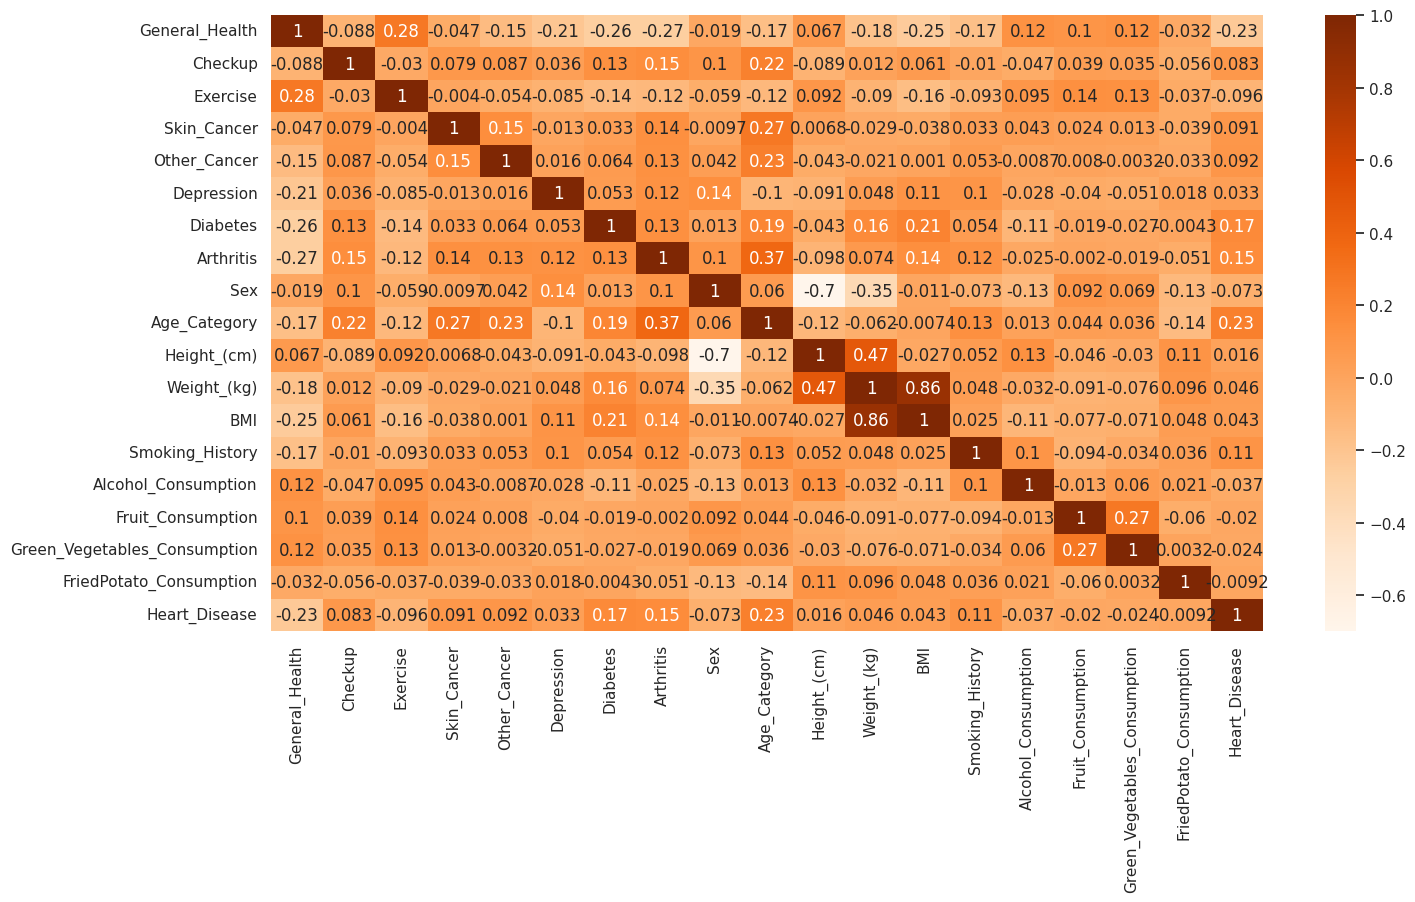

In [ ]:
sns.heatmap(
   df.corr(), annot=True, cmap="Oranges"
)  # Heatmap showing correlation between the attributes.

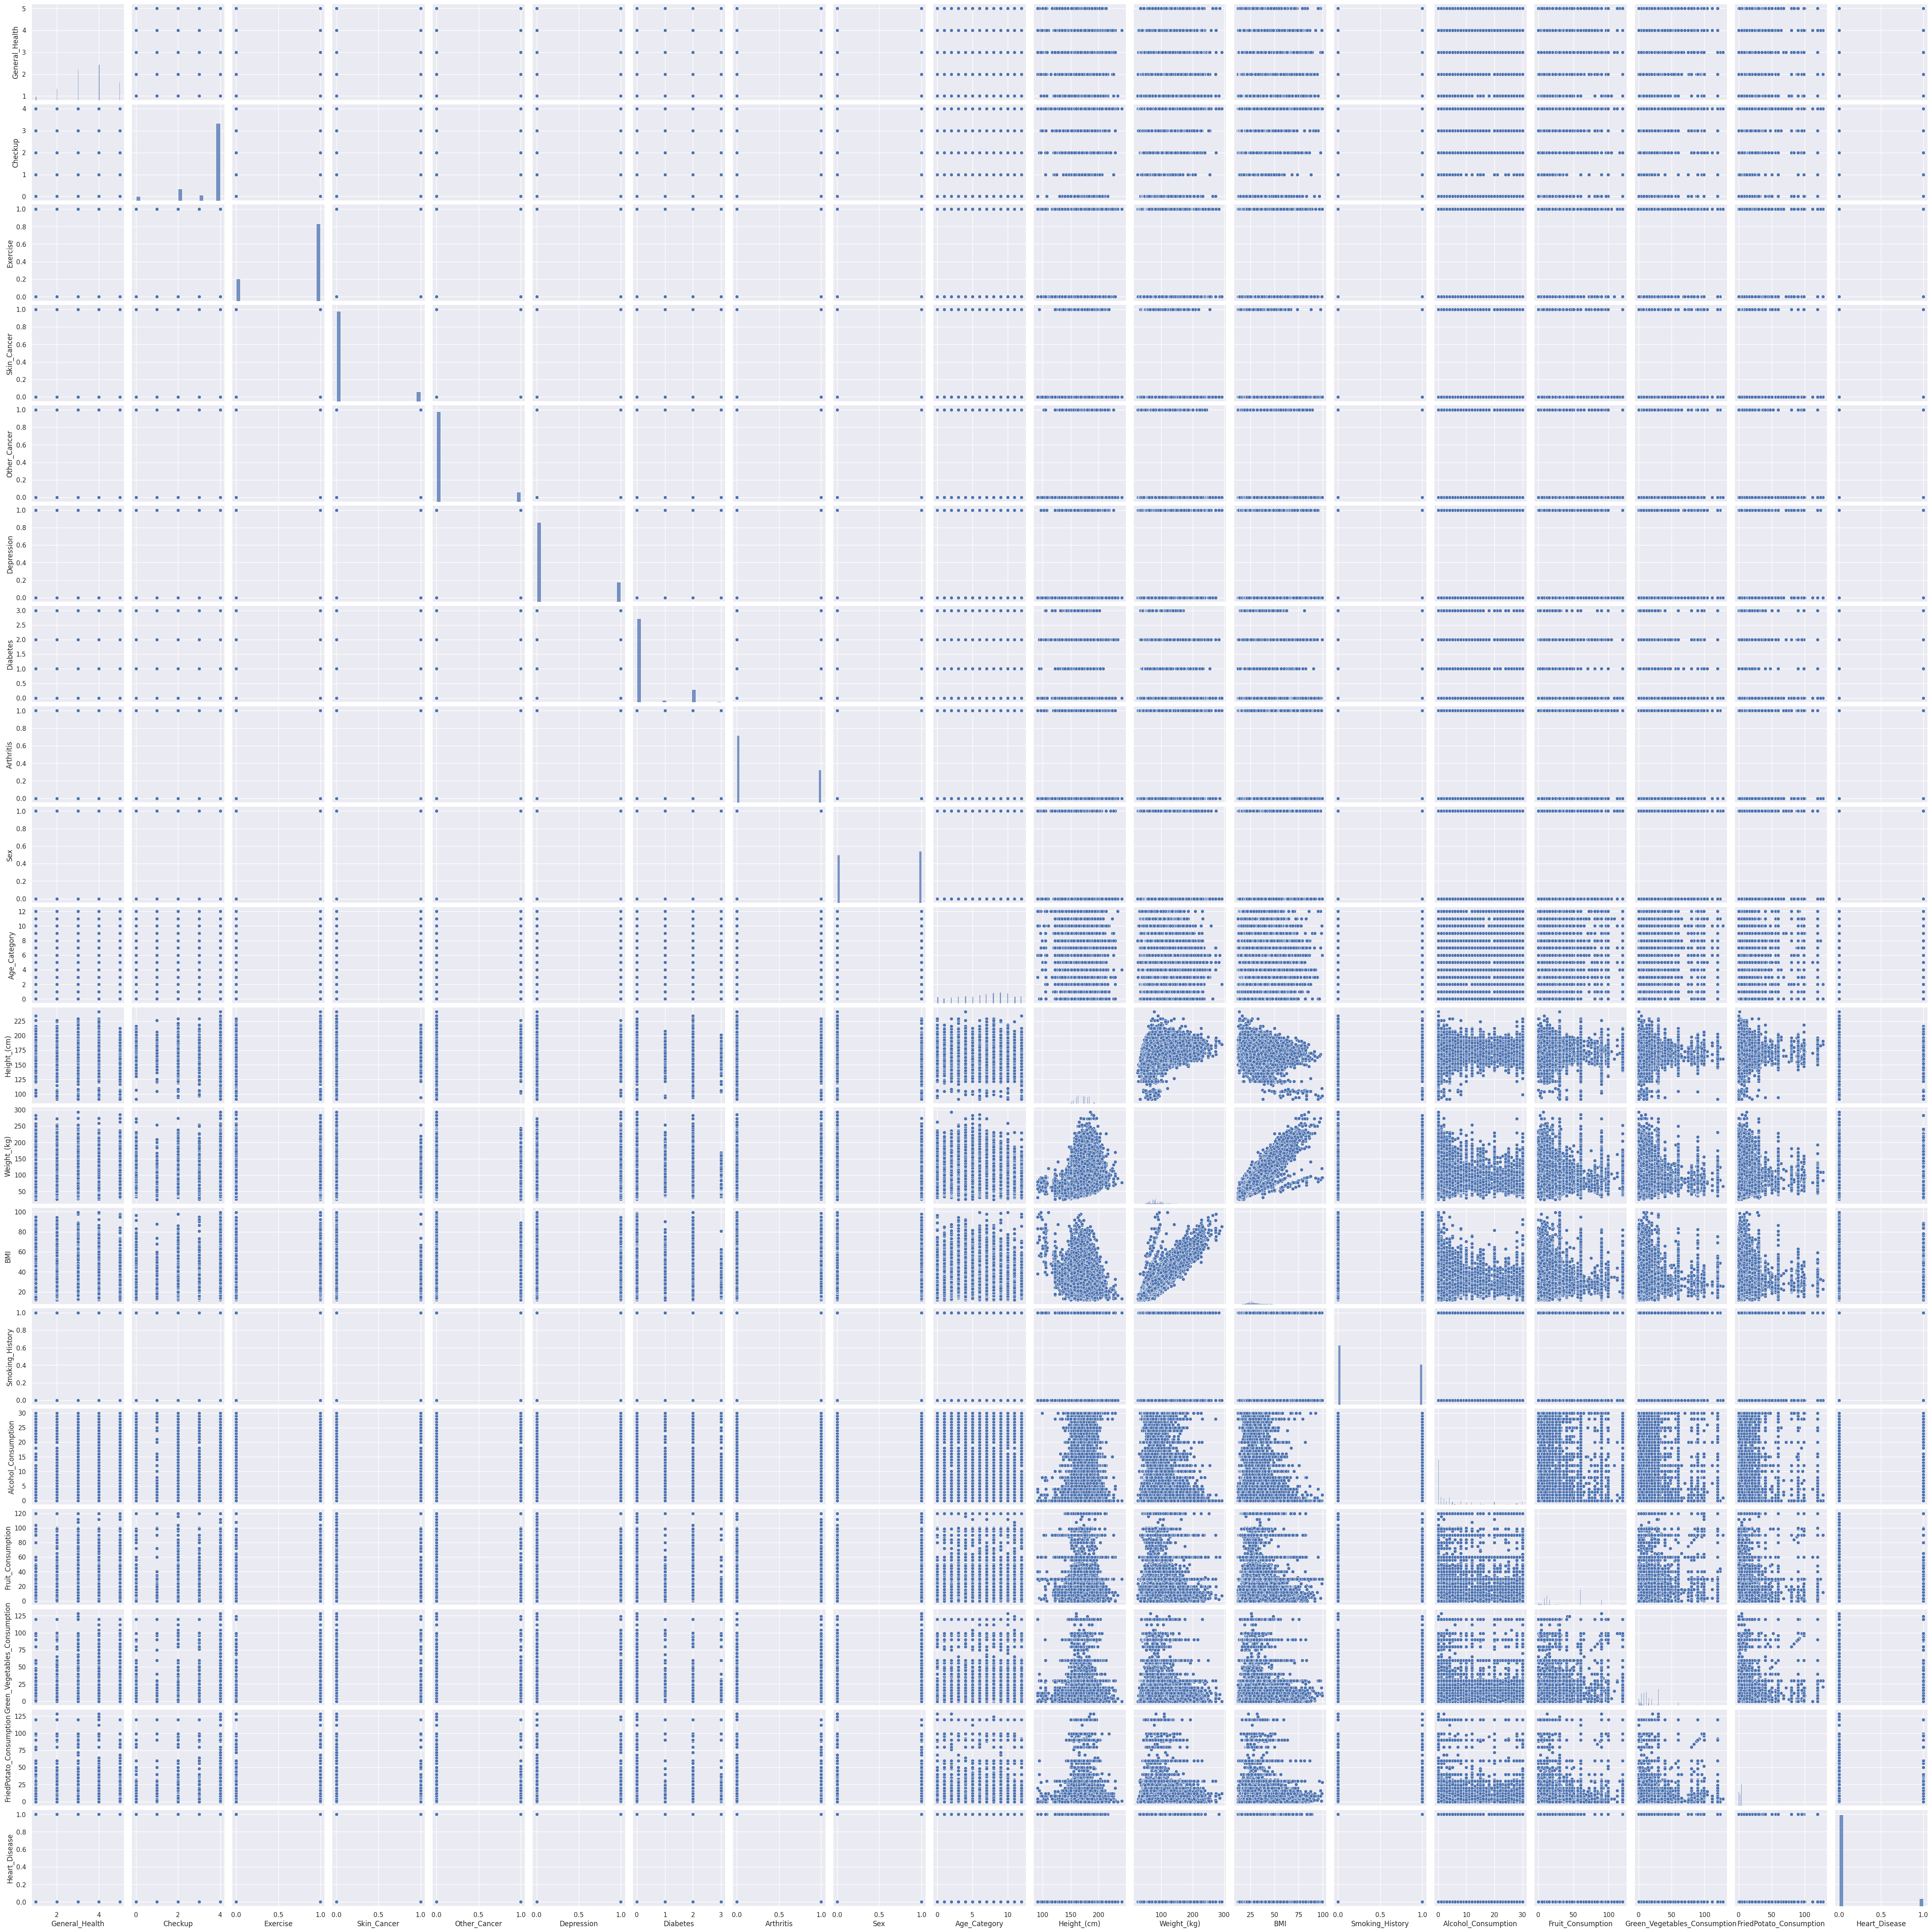

In [ ]:
sns.pairplot(
 df)

Convert it into an H2OFrame object.

In [ ]:
h2o_df = h2o.H2OFrame(
   df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
h2o_df.types

{'General_Health': 'int',
 'Checkup': 'int',
 'Exercise': 'int',
 'Skin_Cancer': 'int',
 'Other_Cancer': 'int',
 'Depression': 'int',
 'Diabetes': 'int',
 'Arthritis': 'int',
 'Sex': 'int',
 'Age_Category': 'int',
 'Height_(cm)': 'int',
 'Weight_(kg)': 'real',
 'BMI': 'real',
 'Smoking_History': 'int',
 'Alcohol_Consumption': 'int',
 'Fruit_Consumption': 'int',
 'Green_Vegetables_Consumption': 'int',
 'FriedPotato_Consumption': 'int',
 'Heart_Disease': 'int'}

In [ ]:
pct_rows = 0.80  # Setting up the data split between training and test dataset.
df_train, df_test = h2o_df.split_frame([pct_rows])

In [ ]:
print(df_train.shape)
print(df_test.shape)

(247073, 19)
(61781, 19)


In [ ]:
df_train.head()

General_Health    Checkup    Exercise    Skin_Cancer    Other_Cancer    Depression    Diabetes    Arthritis    Sex    Age_Category    Height_(cm)    Weight_(kg)    BMI    Smoking_History    Alcohol_Consumption    Fruit_Consumption    Green_Vegetables_Consumption    FriedPotato_Consumption    Heart_Disease
----------------  ---------  ----------  -------------  --------------  ------------  ----------  -----------  -----  --------------  -------------  -------------  -----  -----------------  ---------------------  -------------------  ------------------------------  -------------------------  ---------------
               1          2           0              0               0             0           0            1      1              10            150          32.66  14.54                  1                      0                   30                              16                         12                0
               4          4           0              0               0             0           2            0      1              10            165          77.11  28.29                  0                      0                   30                               0                          4                1
               1          4           1              0               0             0           2            0      0              11            180          93.44  28.73                  0                      0                   30                              30                          8                1
               3          4           0              0               0             0           0            0      0              12            191          88.45  24.37                  1                      0                    8                               4                          0                0
               3          4           0              0               0             1           0            1      0               8            183         154.22  46.11                  0                      0                   12                              12                         12                0
               3          4           1              0               0             0           0            1      1               9            165         108.86  39.94                  1                      3                   30                               8                          8                0
               2          4           0              0               0             1           0            0      1               9            163          72.57  27.46                  1                      0                   12                              12                          4                0
               2          4           0              1               0             0           2            0      0              11            175          73.48  23.92                  0                      0                    2                               8                         30                1
               4          4           0              0               0             1           0            0      1               6            168          83.91  29.86                  0                      8                    8                               0                          2                0
               2          4           0              1               0             0           0            0      0               9            178         113.4   35.87                  1                      4                    2                               3                          4                0
[10 rows x 19 columns]

In [ ]:
X = h2o_df.columns
print(X)

['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption', 'Heart_Disease']


In [ ]:
# Set target and predictor variables
y = "Heart_Disease"
X.remove(y)  # Removing the result frm our predictors data
print(X)

['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']


In [ ]:
print(X)

['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']


AutoML is designed to automatically train and tune machine learning models without requiring explicit configuration or tuning from the user.

In [ ]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

start the training process of the AutoML algorithm

In [ ]:
aml.train(x=X, y=y, training_frame=df_train)

AutoML progress: |
19:19:58.751: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

███████
19:20:21.944: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
19:20:24.502: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█████
19:20:42.263: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
19:20:45.300: _response param, 

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_3_AutoML_1_20240219_191957


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  --------
Stacking strategy                          blending
Number of base models (used / total)       11/17
# GBM base models (used / total)           6/7
# XGBoost base models (used / total)       3/5
# DeepLearning base models (used / total)  1/2
# DRF base models (used / total)           1/2
# GLM base models (used / total)           0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         AUTO
Metalearner nfolds                         0
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.05843705347575977
RMSE: 0.24173757150215555
MAE: 0.12179094551630668
RMSLE: 0.16813800428236925
Mean Residual Deviance: 0.05843705347575977
R^2: 0.20188603577546504
Null degrees of freedom: 9968
Residual degrees of freedom: 9957
Null deviance: 729.9197392592296
Residual deviance: 582.5589860998491
AIC: 6.7793033489341425

ModelMetricsRegressionGLM: stackedensemble
** Reported on validation data. **

MSE: 0.06208885485692721
RMSE: 0.2491763529248456
MAE: 0.12609200147964747
RMSLE: 0.1746294830437449
Mean Residual Deviance: 0.06208885485692721
R^2: 0.14191739281173654
Null degrees of freedom: 24654
Residual degrees of freedom: 24643
Null deviance: 1783.9975880449433
Residual deviance: 1530.8007164975404
AIC: 1472.9597740935883

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [ ]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id                                                     rmse        mse       mae     rmsle    mean_residual_deviance
-------------------------------------------------------  --------  ---------  --------  --------  ------------------------
StackedEnsemble_BestOfFamily_4_AutoML_1_20240219_165633  0.253032  0.0640254  0.128017  0.177108                 0.0640254
StackedEnsemble_BestOfFamily_3_AutoML_1_20240219_165633  0.253076  0.0640474  0.127763  0.177091                 0.0640474
GBM_grid_1_AutoML_1_20240219_165633_model_2              0.253078  0.0640484  0.129524  0.177141                 0.0640484
StackedEnsemble_AllModels_2_AutoML_1_20240219_165633     0.253126  0.0640728  0.127725  0.177106                 0.0640728
GBM_2_AutoML_1_20240219_165633                           0.253237  0.0641292  0.128803  0.177391                 0.0641292
StackedEnsemble_BestOfFamily_2_AutoML_1_20240219_165633  0.253257  0.0641393  0.128655  0.177258                 0.0641393
GBM_5_AutoML_1_20240219_165633                           0.253261  0.0641412  0.129101  0.177381                 0.0641412
StackedEnsemble_AllModels_1_AutoML_1_20240219_165633     0.253283  0.0641523  0.128266  0.177273                 0.0641523
XGBoost_3_AutoML_1_20240219_165633                       0.25359   0.0643078  0.129045  0.177798                 0.0643078
GBM_3_AutoML_1_20240219_165633                           0.25371   0.0643689  0.128929  0.177788                 0.0643689
StackedEnsemble_BestOfFamily_1_AutoML_1_20240219_165633  0.254023  0.0645276  0.13178   0.177889                 0.0645276
GBM_1_AutoML_1_20240219_165633                           0.25418   0.0646075  0.12948   0.178345                 0.0646075
DeepLearning_1_AutoML_1_20240219_165633                  0.254577  0.0648095  0.119001  0.176694                 0.0648095
GBM_4_AutoML_1_20240219_165633                           0.254876  0.0649618  0.129424  0.178919                 0.0649618
XRT_1_AutoML_1_20240219_165633                           0.257117  0.0661091  0.135208  0.18154                  0.0661091
GBM_grid_1_AutoML_1_20240219_165633_model_1              0.257635  0.0663756  0.135521  0.181077                 0.0663756
GLM_1_AutoML_1_20240219_165633                           0.257886  0.0665054  0.148951  0.181667                 0.0665054
XGBoost_grid_1_AutoML_1_20240219_165633_model_1          0.258264  0.0667001  0.132323  0.182326                 0.0667001
DRF_1_AutoML_1_20240219_165633                           0.260188  0.0676976  0.136085  0.18523                  0.0676976
DeepLearning_grid_1_AutoML_1_20240219_165633_model_1     0.262378  0.0688422  0.123063  0.181554                 0.0688422
XGBoost_2_AutoML_1_20240219_165633                       0.263004  0.0691713  0.135449  0.186753                 0.0691713
XGBoost_grid_1_AutoML_1_20240219_165633_model_2          0.264342  0.0698768  0.137013  0.188242                 0.0698768
GBM_grid_1_AutoML_1_20240219_165633_model_3              0.268556  0.0721225  0.146712  0.186388                 0.0721225
XGBoost_1_AutoML_1_20240219_165633                       0.275703  0.0760122  0.147551  0.199408                 0.0760122
XGBoost_grid_1_AutoML_1_20240219_165633_model_3          0.394339  0.155503   0.388848  0.318934                 0.155503
[25 rows x 6 columns]

In [ ]:
print(
    aml.leaderboard
)  # Leaderboard showing the performance of different models on the dataset.

model_id                                                     rmse        mse       mae     rmsle    mean_residual_deviance
StackedEnsemble_BestOfFamily_4_AutoML_1_20240219_165633  0.253032  0.0640254  0.128017  0.177108                 0.0640254
StackedEnsemble_BestOfFamily_3_AutoML_1_20240219_165633  0.253076  0.0640474  0.127763  0.177091                 0.0640474
GBM_grid_1_AutoML_1_20240219_165633_model_2              0.253078  0.0640484  0.129524  0.177141                 0.0640484
StackedEnsemble_AllModels_2_AutoML_1_20240219_165633     0.253126  0.0640728  0.127725  0.177106                 0.0640728
GBM_2_AutoML_1_20240219_165633                           0.253237  0.0641292  0.128803  0.177391                 0.0641292
StackedEnsemble_BestOfFamily_2_AutoML_1_20240219_165633  0.253257  0.0641393  0.128655  0.177258                 0.0641393
GBM_5_AutoML_1_20240219_165633                           0.253261  0.0641412  0.129101  0.177381                 0.0641412
StackedEnsemble_

In [ ]:
model_index = 0
glm_index = 0
glm_model = ""
aml_leaderboard_df = aml.leaderboard.as_data_frame()
models_dict = {}
for m in aml_leaderboard_df["model_id"]:
    models_dict[m] = model_index
    if "StackedEnsemble" not in m:
        break
    model_index = model_index + 1

for m in aml_leaderboard_df["model_id"]:
    if "GLM" in m:
        models_dict[m] = glm_index
        break
    glm_index = glm_index + 1
models_dict

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


{'StackedEnsemble_BestOfFamily_4_AutoML_1_20240219_165633': 0,
 'StackedEnsemble_BestOfFamily_3_AutoML_1_20240219_165633': 1,
 'GBM_grid_1_AutoML_1_20240219_165633_model_2': 2,
 'GLM_1_AutoML_1_20240219_165633': 16}

In [ ]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])

2


In [ ]:
best_model.algo

'gbm'

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
import matplotlib.cbook

warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

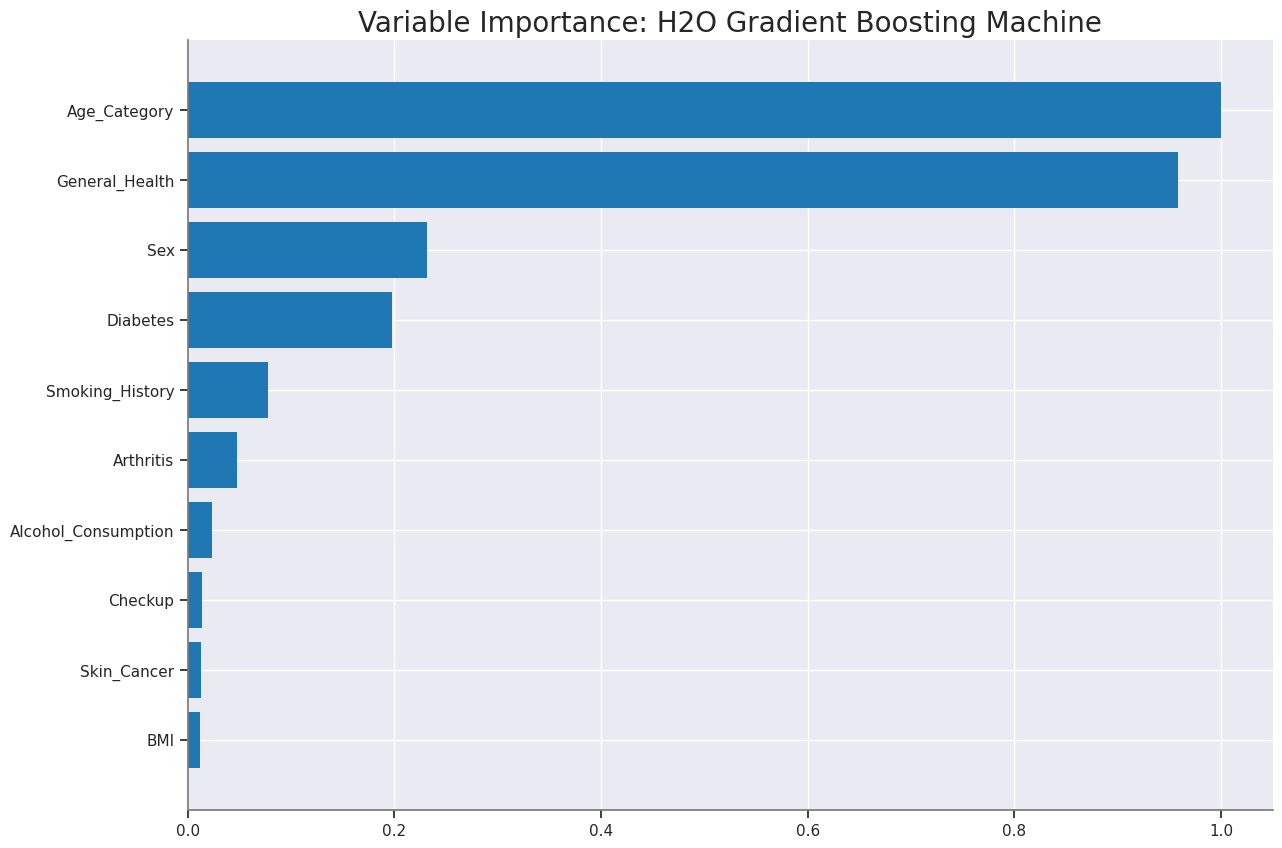

<Figure size 1600x800 with 0 Axes>

In [ ]:
if best_model.algo in [
    "gbm",
    "drf",
    "xrt",
    "xgboost",
]:  # Importance of all the variables in GBM algorithm.
    best_model.varimp_plot()

In H2O's Gradient Boosting Machine (GBM), variable importance refers to the measure of the relative importance of each predictor variable in the model's performance. Variable importance is computed based on the contribution of each predictor variable to the reduction of the error in the GBM algorithm.

VARIABLE IMPORTANCE : This plot helps visualize the importance and direction of each predictor variable in the model.

<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-44-0cab54a0793b>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if glm_index is not 0:


16
glm


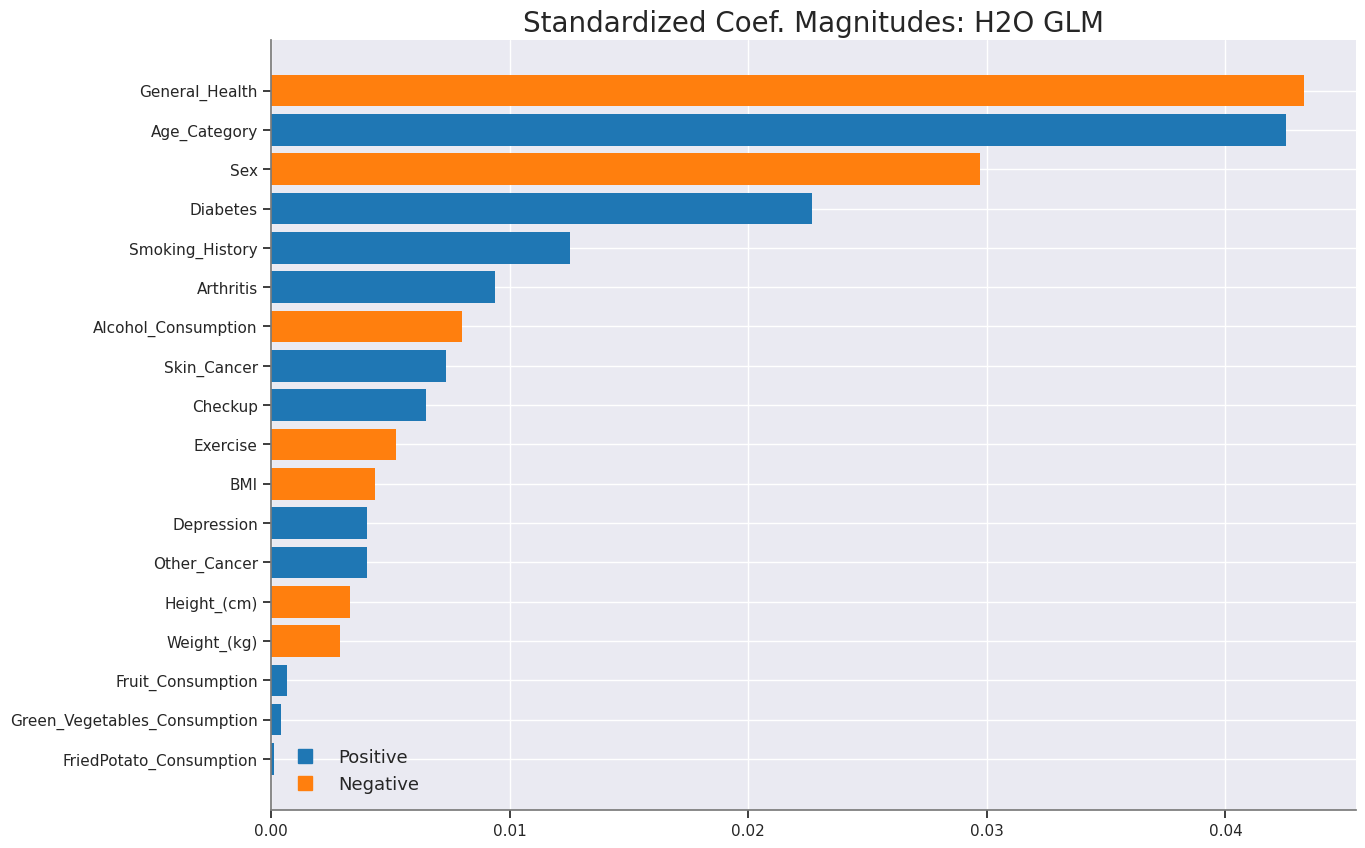

In [ ]:
if glm_index is not 0:
    print(glm_index)
    glm_model = h2o.get_model(aml.leaderboard[glm_index, "model_id"])
    print(glm_model.algo)
    glm_model.std_coef_plot()

Standardized coefficient magnitudes are a measure of the importance of each input variable in a predictive model, after standardizing all variables to have a mean of zero and a standard deviation of one. The values of standardized coefficient magnitudes can range from negative infinity to positive infinity, but they are typically expressed as a percentage.

 A higher magnitude value indicates that the variable has a stronger impact on the outcome variable, while a lower value indicates a weaker impact.

In [ ]:
print(best_model.rmse(train=True))

0.2521713371368357


In [ ]:
def model_performance_stats(perf):
    d = {}
    try:
        d["mse"] = perf.mse()
    except:
        pass
    try:
        d["rmse"] = perf.rmse()
    except:
        pass
    try:
        d["null_degrees_of_freedom"] = perf.null_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_degrees_of_freedom"] = perf.residual_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_deviance"] = perf.residual_deviance()
    except:
        pass
    try:
        d["null_deviance"] = perf.null_deviance()
    except:
        pass
    try:
        d["aic"] = perf.aic()
    except:
        pass
    try:
        d["logloss"] = perf.logloss()
    except:
        pass
    try:
        d["auc"] = perf.auc()
    except:
        pass
    try:
        d["gini"] = perf.gini()
    except:
        pass
    return d

Stats of the best model : gbm

In [ ]:
mod_perf = best_model.model_performance(df_test)
stats_test = {}
stats_test = model_performance_stats(mod_perf)
stats_test

{'mse': 0.06329642968602868,
 'rmse': 0.2515878170461135,
 'null_degrees_of_freedom': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'null_deviance': None}

Findings:

The MSE and RMSE values indicate the average squared error and its square root, respectively, for the predictions made by the model.
The lack of information on degrees of freedom and deviance limits our ability to perform further statistical analysis and model diagnostics.
Without values for null and residual deviance, it's challenging to assess the goodness of fit of the model or compare it to a null model.

In [ ]:
predictions = best_model.predict(df_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


These predictions can then be used for further evaluation, such as calculating accuracy, precision, recall, or other relevant metrics to assess the performance of the model on unseen dat

In [ ]:
y_pred = h2o.as_list(
    predictions
)  # Predictions on Test Dataset using the best model from the leaderboard.
print(y_pred)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
        predict
0      0.049563
1      0.372540
2      0.124470
3      0.158777
4      0.001472
...         ...
61908  0.112852
61909  0.008195
61910  0.003402
61911  0.093064
61912  0.058916

[61913 rows x 1 columns]


In [ ]:
y_test = h2o.as_list(df_test[y])  # Real Answers
y_test

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


Heart_Disease
0                  0
1                  1
2                  0
3                  0
4                  0
...              ...
61908              0
61909              0
61910              0
61911              0
61912              0

[61913 rows x 1 columns]

In [ ]:
print(X)

['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

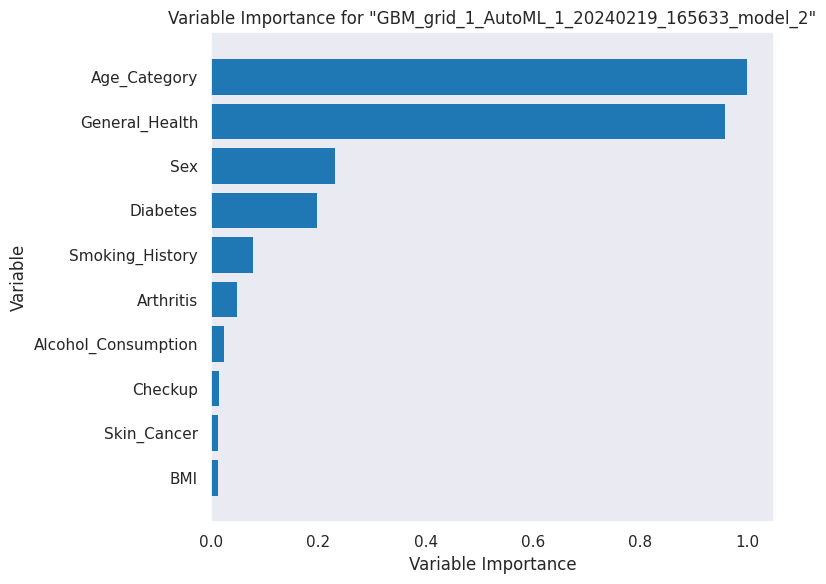

In [ ]:
explain_model = aml.explain(frame = df_test, figsize = (8,6),include_explanations=['varimp'])

**Is the relationship significant?**
 1. Higher importance scores suggest more significant relationships between predictors and the target variable. Such as here for general health , age category there is a more significant relationship.
 2. yes, because the R-sqaured is 0.185 which is moderatively high and all features' p value is 0 except Green veegtables, fried po.tato, fruit consumption so the relationship is very much significant



In [ ]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(df['Heart_Disease'], df[['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Heart_Disease   R-squared (uncentered):                   0.184
Model:                            OLS   Adj. R-squared (uncentered):              0.184
Method:                 Least Squares   F-statistic:                              3859.
Date:                Mon, 19 Feb 2024   Prob (F-statistic):                        0.00
Time:                        17:02:03   Log-Likelihood:                         -18509.
No. Observations:              308854   AIC:                                  3.705e+04
Df Residuals:                  308836   BIC:                                  3.725e+04
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
General_Health                  -0.0419      0.001    -81.081      0.000      -0.043      -0.041
Checkup                          0.0067      0.000     14.222      0.000       0.006       0.008
Exercise                        -0.0115      0.001     -9.696      0.000      -0.014      -0.009
Skin_Cancer                      0.0247      0.002     15.069      0.000       0.021       0.028
Other_Cancer                     0.0155      0.002      9.502      0.000       0.012       0.019
Depression                       0.0110      0.001      8.970      0.000       0.009       0.013
Diabetes                         0.0310      0.001     45.429      0.000       0.030       0.032
Arthritis                        0.0213      0.001     19.209      0.000       0.019       0.023
Sex                             -0.0570      0.001    -44.693      0.000      -0.060      -0.055
Age_Category                     0.0120      0.000     76.378      0.000       0.012       0.012
Height_(cm)                      0.0010   2.25e-05     44.255      0.000       0.001       0.001
Weight_(kg)                     -0.0013   6.38e-05    -20.291      0.000      -0.001      -0.001
BMI                              0.0026      0.000     14.324      0.000       0.002       0.003
Smoking_History                  0.0242      0.001     24.636      0.000       0.022       0.026
Alcohol_Consumption             -0.0009   5.83e-05    -15.184      0.000      -0.001      -0.001
Fruit_Consumption             3.125e-05   1.96e-05      1.592      0.111   -7.23e-06    6.97e-05
Green_Vegetables_Consumption  3.088e-05   3.26e-05      0.948      0.343    -3.3e-05    9.47e-05
FriedPotato_Consumption       1.431e-05   5.51e-05      0.260      0.795   -9.37e-05       0.000
==============================================================================
Omnibus:                   155873.740   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           766225.151
Skew:                           2.546   Prob(JB):                         0.00
Kurtosis:                       8.798   Cond. No.                         724.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Are any model assumptions violated?**

No, the dependent variable is 0/1, so the question is a classification question which make sense to all models in AutoML.

*** Is there any multicollinearity in the model?**

In [ ]:
df1 = df[['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']].dropna() #subset the dataframe


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# the independent variables set
independent = df[['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = independent.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(independent.values, i)
                          for i in range(len(independent.columns))]

print(vif_data)

                         feature         VIF
0                 General_Health   16.877411
1                        Checkup   13.907342
2                       Exercise    5.059481
3                    Skin_Cancer    1.215952
4                   Other_Cancer    1.199985
5                     Depression    1.404828
6                       Diabetes    1.353112
7                      Arthritis    1.884000
8                            Sex    3.948406
9                   Age_Category    6.407300
10                   Height_(cm)   68.993761
11                   Weight_(kg)  141.966121
12                           BMI  131.792303
13               Smoking_History    1.826657
14           Alcohol_Consumption    1.484316
15             Fruit_Consumption    2.721358
16  Green_Vegetables_Consumption    2.241009
17       FriedPotato_Consumption    1.611548


 yes, from the VIF data, we could know that variables have more or less correlationship with each other .It appears that there is multicollinearity present in the model, particularly between General_Health and Checkup, as well as among Height_(cm), Weight_(kg), and BMI.

 **In the multivariate models are predictor variables independent of all the other predictor variables?**

<Axes: >

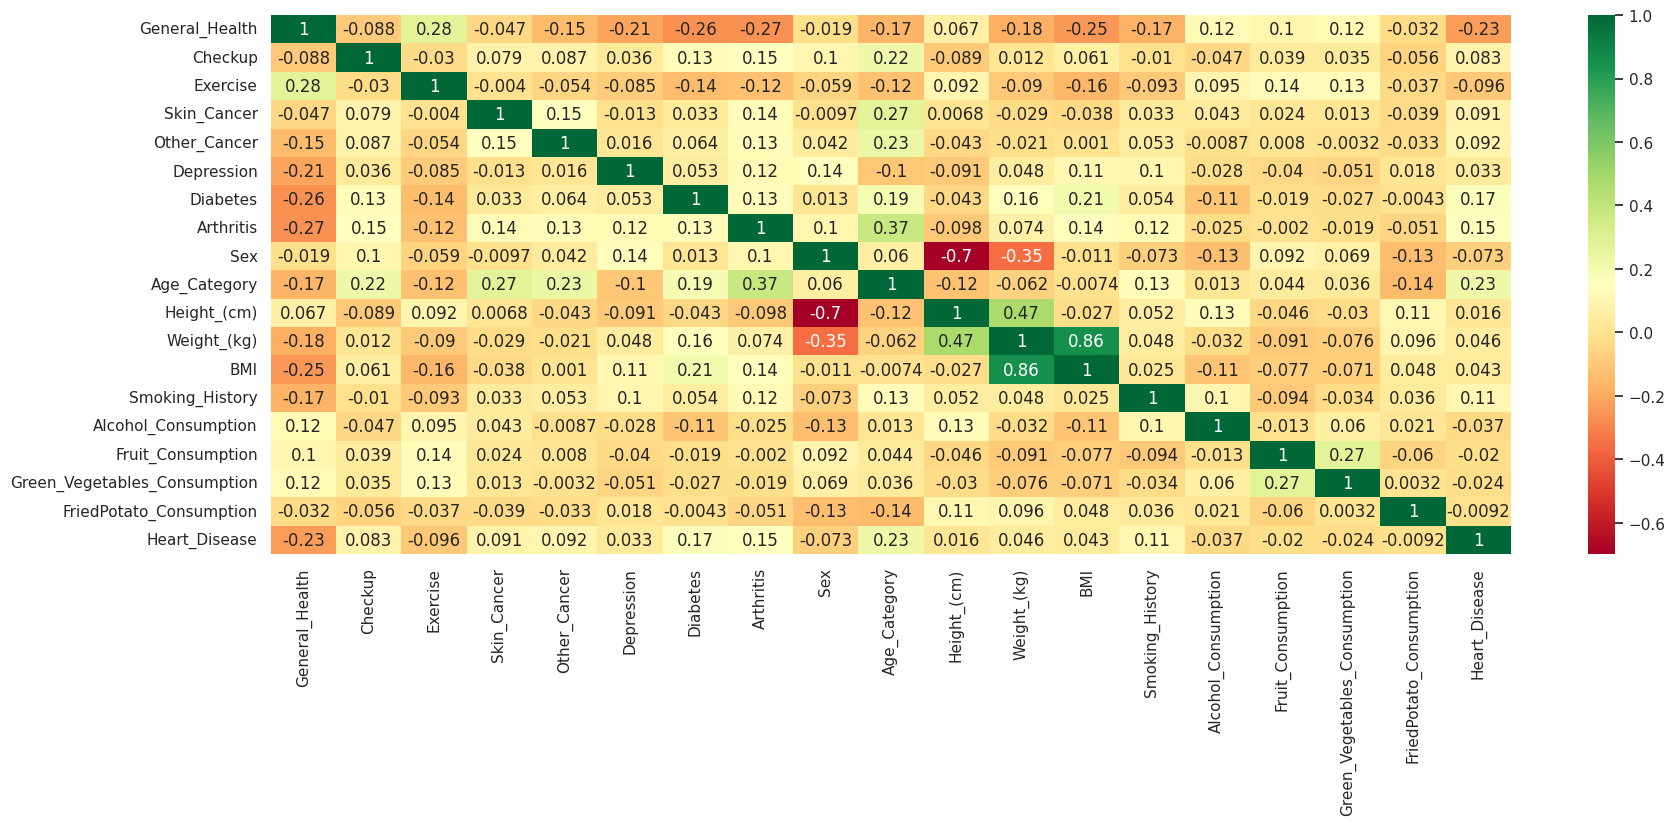

In [ ]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

No, they are all not independent of each other, we can know that from the correlation heap map.

**In multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**
The most significant predictor variable is General health followed by Age Category and Skin cancer and height are the most insiginificant one.

**Does the model make sense?**
Yes, models in AutoML can deal with it as it is a classification question.

 **Does regularization help?**



REGULARIZATION

RIDGE REGRESSION

In [ ]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

heartdisease_glm = H2OGeneralizedLinearEstimator(
    family="gaussian", lambda_=0, compute_p_values=True, nfolds=5
)  # Elastic Net Regularization
heartdisease_glm_regularization_ridge = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=0, nfolds=5
)  # RIDGE Regularization
heartdisease_glm_regularization_lasso = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=1, nfolds=5
)  # LASSO Regularization
heartdisease_glm_regularization_lamba_search = H2OGeneralizedLinearEstimator(
    lambda_search=True
)  # Lambda Search

In [ ]:
heartdisease_glm.train(x=X, y=y, training_frame=df_train)

glm Model Build progress: |

/usr/local/lib/python3.10/dist-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708104789811_18


GLM Model: summary
    family    link      regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  None              18                            18                             1                       py_2_sid_97b6

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.06616686346838488
RMSE: 0.2572292041514433
MAE: 0.14818760003419962
RMSLE: 0.18115133370795664
Mean Residual Deviance: 0.06616686346838488
R^2: 0.1121933950823073
Null degrees of freedom: 247204
Residual degrees of freedom: 247186
Null deviance: 18423.809186704944
Residual deviance: 16356.779483702083
AIC: 30273.560406661833

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 0.06617944160879144
RMSE: 0.25725365227493163
MAE: 0.14820117408929254
RMSLE: 0.18117249334027058
Mean Residual Deviance: 0.06617944160879144
R^2: 0.11202462546644265
Null degrees of freedom: 247204
Residual degrees of freedom: 247186
Null deviance: 18424.176343824784
Residual deviance: 16359.888862901287
AIC: 30320.5489373466

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     0.148198   0.0012199   0.146778      0.149322      0.14713       0.149428      0.148333
mean_residual_deviance  0.0661764  0.00131276  0.0650553     0.0673038     0.0645016     0.0673007     0.0667208
mse                     0.0661764  0.00131276  0.0650553     0.0673038     0.0645016     0.0673007     0.0667208
null_deviance           3684.84    85.3183     3603.03       3761.93       3582.81       3751.91       3724.5
r2                      0.111984   0.00265269  0.111032      0.115418      0.111792      0.10831       0.113368
residual_deviance       3271.98    74.6482     3202.8        3327.5        3181.93       3345.45       3302.21
rmse                    0.257238   0.00255601  0.255059      0.25943       0.253972      0.259424      0.258304
rmsle                   0.181164   0.00149756  0.179823      0.182353      0.179338      0.182639      0.181666

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective            training_rmse       training_deviance    training_mae         training_r2
--  -------------------  ----------  ------------  -------------------------  -------------------  ------------------  -------------------  -------------------  ------------------
    2024-02-16 17:50:32  0.000 sec   0             18423.809186704944         0.07452846498535605
    2024-02-16 17:50:32  0.921 sec   1                                                             0.2572292041514433  0.06616686346838488  0.14818760003419962  0.1121933950823073

Variable Importances: 
variable                      relative_importance    scaled_importance    percentage
----------------------------  ---------------------  -------------------  ------------
General_Health                0.0437493              1                    0.211731
Age_Category                  0.0421606              0.963686             0.204042
Sex                           0.0291295              0.665827             0.140976
Diabetes                      0.0226233              0.517111             0.109488
Smoking_History               0.0117642              0.268901             0.0569346
Arthritis                     0.00966821             0.220991             0.0467906
Skin_Cancer                   0.00710784             0.162468             0.0343994
Checkup                

In [ ]:
heartdisease_glm_regularization_ridge.train(x=X, y=y, training_frame=df_train)

glm Model Build progress: |

/usr/local/lib/python3.10/dist-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708104789811_19


GLM Model: summary
    family    link      regularization               number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Ridge ( lambda = 6.374E-5 )  18                            18                             1                       py_2_sid_97b6

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.06616686349428923
RMSE: 0.2572292042017959
MAE: 0.14818611642970866
RMSLE: 0.18115087897598015
Mean Residual Deviance: 0.06616686349428923
R^2: 0.11219339473473067
Null degrees of freedom: 247204
Residual degrees of freedom: 247186
Null deviance: 18423.809186704944
Residual deviance: 16356.77949010577
AIC: 30273.56050344266

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 0.06617850999898128
RMSE: 0.25725184158520864
MAE: 0.14819973391477756
RMSLE: 0.1811707100446823
Mean Residual Deviance: 0.06617850999898128
R^2: 0.11203712552008438
Null degrees of freedom: 247204
Residual degrees of freedom: 247186
Null deviance: 18423.84070546274
Residual deviance: 16359.658564298168
AIC: 30317.069001304568

Cross-Validation Metrics Summary: 
                        mean       sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     0.1482     0.000244802  0.147915      0.148241      0.148188      0.148077      0.148577
mean_residual_deviance  0.0661785  0.000232282  0.0662452     0.0659625     0.0659502     0.0662235     0.066511
mse                     0.0661785  0.000232282  0.0662452     0.0659625     0.0659502     0.0662235     0.066511
null_deviance           3684.77    24.3321      3673.54       3654.21       3676.87       3707.26       3711.97
r2                      0.112022   0.00323397   0.109346      0.110925      0.109609      0.117178      0.113054
residual_deviance       3271.93    15.4256      3271.85       3248.85       3273.83       3272.83       3292.3
rmse                    0.257251   0.00045135   0.257381      0.256832      0.256808      0.257339      0.257897
rmsle                   0.18117    0.000256867  0.181284      0.180979      0.181075      0.180949      0.181566

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective            training_rmse       training_deviance    training_mae         training_r2
--  -------------------  ----------  ------------  -------------------------  -------------------  ------------------  -------------------  -------------------  -------------------
    2024-02-16 17:51:07  0.000 sec   0             18423.809186704944         0.07452846498535605
    2024-02-16 17:51:07  0.658 sec   1                                                             0.2572292042017959  0.06616686349428923  0.14818611642970866  0.11219339473473067

Variable Importances: 
variable                      relative_importance    scaled_importance    percentage
----------------------------  ---------------------  -------------------  ------------
General_Health                0.0437466              1                    0.211736
Age_Category                  0.042158               0.963685             0.204047
Sex                           0.0291256              0.66578              0.14097
Diabetes                      0.0226227              0.51713              0.109495
Smoking_History               0.0117643              0.268918             0.0569397
Arthritis                     0.00966898             0.221022             0.0467984
Skin_Cancer                   0.0071081              0.162483     

LASSO REGRESSION

In [ ]:
heartdisease_glm_regularization_lasso.train(x=X, y=y, training_frame=df_train)

glm Model Build progress: |

/usr/local/lib/python3.10/dist-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708104789811_20


GLM Model: summary
    family    link      regularization              number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  --------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Lasso (lambda = 6.374E-5 )  18                            18                             1                       py_2_sid_97b6

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.06616698245233975
RMSE: 0.2572294354313669
MAE: 0.14814767006343163
RMSLE: 0.1811360661935606
Mean Residual Deviance: 0.06616698245233975
R^2: 0.11219179859222939
Null degrees of freedom: 247204
Residual degrees of freedom: 247186
Null deviance: 18423.809186704944
Residual deviance: 16356.808897130646
AIC: 30274.004940384257

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 0.06617649839386819
RMSE: 0.2572479317581935
MAE: 0.1481501812546327
RMSLE: 0.18114861104180202
Mean Residual Deviance: 0.06617649839386819
R^2: 0.11206411661823046
Null degrees of freedom: 247204
Residual degrees of freedom: 247186
Null deviance: 18423.96156059111
Residual deviance: 16359.161285456186
AIC: 30309.554682835467

Cross-Validation Metrics Summary: 
                        mean       sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     0.14815    0.000578489  0.148197      0.148451      0.14867       0.147169      0.148263
mean_residual_deviance  0.0661759  0.000811589  0.0662518     0.0659449     0.0673776     0.0651123     0.0661927
mse                     0.0661759  0.000811589  0.0662518     0.0659449     0.0673776     0.0651123     0.0661927
null_deviance           3684.79    53.5577      3681.29       3692.35       3765.59       3617.1        3667.64
r2                      0.112042   0.0020174    0.110556      0.114595      0.112138      0.109606      0.113312
residual_deviance       3271.83    45.0805      3274.3        3269.22       3343.14       3220.45       3252.05
rmse                    0.257243   0.00157634   0.257394      0.256797      0.259572      0.255171      0.257279
rmsle                   0.181146   0.000873046  0.181273      0.18087       0.182426      0.179998      0.181164

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective            training_rmse       training_deviance    training_mae         training_r2
--  -------------------  ----------  ------------  -------------------------  -------------------  ------------------  -------------------  -------------------  -------------------
    2024-02-16 17:53:08  0.000 sec   0             18423.809186704944         0.07452846498535605
    2024-02-16 17:53:08  0.396 sec   1                                                             0.2572294354313669  0.06616698245233975  0.14814767006343163  0.11219179859222939

Variable Importances: 
variable                      relative_importance    scaled_importance    percentage
----------------------------  ---------------------  -------------------  ------------
General_Health                0.0437343              1                    0.213572
Age_Category                  0.0421929              0.964754             0.206044
Sex                           0.0288664              0.66004              0.140966
Diabetes                      0.022577               0.516231             0.110252
Smoking_History               0.011711               0.267775             0.0571893
Arthritis                     0.00963204             0.22024              0.0470371
Skin_Cancer                   0.00706148             0.161463    

We don't see much difference in the RMSE values after cross validation shows that regularization does not help.

**Which independent variables are significant?**

From the Feature importance plot we come to know that age category and general health are the most important variables.

**Coding professionalism?**
Yes


**Which hyperparameters are important?**



In [ ]:
train, validate, test = np.split(
    df.sample(frac=1, random_state=42), [int(0.6 * len(df)), int(0.8 * len(df))]
)

train = h2o.H2OFrame(train)
validate = h2o.H2OFrame(validate)
test = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
gbm_parameters = {
    "learn_rate": [i * 0.01 for i in range(1, 11)],
    "max_depth": list(range(2, 11)),
    "sample_rate": [i * 0.1 for i in range(5, 11)],
    "col_sample_rate": [i * 0.1 for i in range(1, 11)],
}

In [ ]:
search_criteria = {"strategy": "RandomDiscrete", "max_models": 20, "seed": 1}

In [ ]:
gbm_grid2 = H2OGridSearch(
    model=H2OGradientBoostingEstimator,
    grid_id="gbm_grid2",
    hyper_params=gbm_parameters,
    search_criteria=search_criteria,
)

In [ ]:
gbm_grid2.train(
    x=X, y=y, training_frame=train, validation_frame=validate, ntrees=100, seed=1
)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


Hyper-Parameter Search Summary: ordered by increasing residual_deviance
    col_sample_rate    learn_rate    max_depth    sample_rate    model_ids           residual_deviance
--  -----------------  ------------  -----------  -------------  ------------------  -------------------
    0.7                0.06          5            0.6            gbm_grid2_model_14  0.063017
    0.9                0.07          4            0.9            gbm_grid2_model_17  0.0630235
    0.9                0.1           4            0.7            gbm_grid2_model_15  0.0630723
    0.7                0.03          6            1              gbm_grid2_model_6   0.0630855
    0.6                0.09          3            0.9            gbm_grid2_model_18  0.0630954
    0.6                0.09          3            0.8            gbm_grid2_model_1   0.0631102
    0.8                0.03          5            0.5            gbm_grid2_model_12  0.0631172
    0.5                0.05          7            0.9            gbm_grid2_model_2   0.0631332
    0.3                0.03          8            1              gbm_grid2_model_5   0.0631476
    0.8                0.03          9            0.9            gbm_grid2_model_8   0.0634002
    0.6                0.09          2            0.8            gbm_grid2_model_19  0.0634212
    0.5                0.1           9            1              gbm_grid2_model_7   0.0636233
    0.1                0.07          7            0.8            gbm_grid2_model_9   0.0636897
    0.9                0.09          9            0.6            gbm_grid2_model_3   0.0638749
    0.8                0.04          2            0.9            gbm_grid2_model_4   0.0639873
    0.6                0.01          9            0.8            gbm_grid2_model_11  0.0645608
    0.1                0.08          3            0.8            gbm_grid2_model_13  0.0646416
    0.1                0.02          9            0.8            gbm_grid2_model_16  0.0647525
    0.3                0.02          2            1              gbm_grid2_model_20  0.065735
    1                  0.01          2            0.7            gbm_grid2_model_10  0.067229

In [ ]:
gbm_gridperf2 = gbm_grid2.get_grid(sort_by="residual_deviance", decreasing=False)

In [ ]:
gbm_gridperf2

Hyper-Parameter Search Summary: ordered by increasing residual_deviance
    col_sample_rate    learn_rate    max_depth    sample_rate    model_ids           residual_deviance
--  -----------------  ------------  -----------  -------------  ------------------  -------------------
    0.7                0.06          5            0.6            gbm_grid2_model_14  0.063017
    0.9                0.07          4            0.9            gbm_grid2_model_17  0.0630235
    0.9                0.1           4            0.7            gbm_grid2_model_15  0.0630723
    0.7                0.03          6            1              gbm_grid2_model_6   0.0630855
    0.6                0.09          3            0.9            gbm_grid2_model_18  0.0630954
    0.6                0.09          3            0.8            gbm_grid2_model_1   0.0631102
    0.8                0.03          5            0.5            gbm_grid2_model_12  0.0631172
    0.5                0.05          7            0.9            gbm_grid2_model_2   0.0631332
    0.3                0.03          8            1              gbm_grid2_model_5   0.0631476
    0.8                0.03          9            0.9            gbm_grid2_model_8   0.0634002
    0.6                0.09          2            0.8            gbm_grid2_model_19  0.0634212
    0.5                0.1           9            1              gbm_grid2_model_7   0.0636233
    0.1                0.07          7            0.8            gbm_grid2_model_9   0.0636897
    0.9                0.09          9            0.6            gbm_grid2_model_3   0.0638749
    0.8                0.04          2            0.9            gbm_grid2_model_4   0.0639873
    0.6                0.01          9            0.8            gbm_grid2_model_11  0.0645608
    0.1                0.08          3            0.8            gbm_grid2_model_13  0.0646416
    0.1                0.02          9            0.8            gbm_grid2_model_16  0.0647525
    0.3                0.02          2            1              gbm_grid2_model_20  0.065735
    1                  0.01          2            0.7            gbm_grid2_model_10  0.067229

In [ ]:
list_hyperparameters = []
for i in range(20):
    hyperparameters = gbm_gridperf2.get_hyperparams_dict(i)
    list_hyperparameters.append(hyperparameters)

Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperp

In [ ]:
models = gbm_gridperf2.models

In [ ]:
list_residual_deviance = []
for i in range(20):
    model = models[i]
    performance_metrics = model.model_performance(validate)
    residual_deviance = performance_metrics.mean_residual_deviance()
    list_residual_deviance.append(residual_deviance)

In [ ]:
for i in range(20):
    list_hyperparameters[i]["Residual_Deviance"] = list_residual_deviance[i]

In [ ]:
hyperparameters_dataframe = pd.DataFrame(list_hyperparameters)

In [ ]:
print(hyperparameters_dataframe)

    col_sample_rate  learn_rate  max_depth  sample_rate  Residual_Deviance
0               0.7        0.06          5          0.6           0.063017
1               0.9        0.07          4          0.9           0.063023
2               0.9        0.10          4          0.7           0.063072
3               0.7        0.03          6          1.0           0.063086
4               0.6        0.09          3          0.9           0.063095
5               0.6        0.09          3          0.8           0.063110
6               0.8        0.03          5          0.5           0.063117
7               0.5        0.05          7          0.9           0.063133
8               0.3        0.03          8          1.0           0.063148
9               0.8        0.03          9          0.9           0.063400
10              0.6        0.09          2          0.8           0.063421
11              0.5        0.10          9          1.0           0.063623
12              0.1      

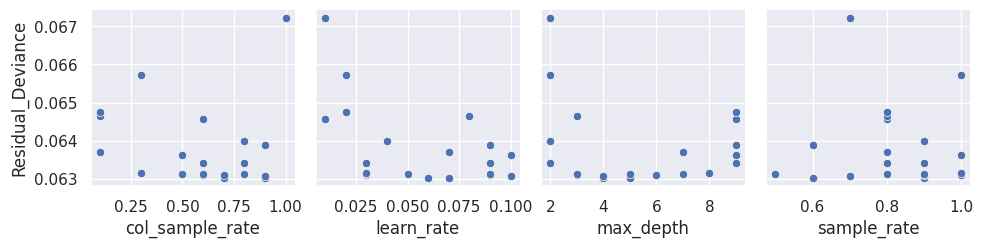

In [150]:
sns.pairplot(
    hyperparameters_dataframe,
    y_vars=["Residual_Deviance"],
    x_vars=["col_sample_rate", "learn_rate", "max_depth", "sample_rate"],
)


From the provided data, the hyperparameter settings with lower Residual Deviance values are considered more important. Based on the Residual Deviance values:
Hyperparameter settings 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, and 13 have relatively low Residual Deviance values compared to others.

Hyperparameter settings 11, 14, 15, 16, 17, 18, and 19 have higher Residual Deviance values, indicating potentially less optimal configurations.

Therefore, the hyperparameters from settings 0 to 13 can be considered more important for optimizing the performance of the Gradient Boosting Machine (GBM) model.

**Excluding the insignificant variables from previous model and executing the new model**

In [ ]:
df1=df.drop(['Height_(cm)','Fruit_Consumption','Green_Vegetables_Consumption','FriedPotato_Consumption'], axis=1)

In [ ]:
import h2o
from h2o.frame import H2OFrame

# Convert pandas DataFrame to H2OFrame
df1_h2o = H2OFrame(df1)

# Setting up the data split between training and test dataset.
pct_rows = 0.80
df1_train, df1_test = df1_h2o.split_frame([pct_rows])


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
X = df1_h2o.columns
print(X)

['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Weight_(kg)', 'BMI', 'Smoking_History', 'Alcohol_Consumption', 'Heart_Disease']


In [ ]:
y = "Heart_Disease"
X.remove(y)  # Removing the result frm our predictors data
print(X)


['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Weight_(kg)', 'BMI', 'Smoking_History', 'Alcohol_Consumption']


In [ ]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [ ]:

aml.train(x=X, y=y, training_frame=df1_train)

AutoML progress: |
03:32:51.320: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█████
03:33:06.698: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


03:33:07.878: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

███
03:33:18.673: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
03:33:21.18: _response param, We hav

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_2_AutoML_3_20240219_33251


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  --------
Stacking strategy                          blending
Number of base models (used / total)       5/12
# GBM base models (used / total)           2/5
# XGBoost base models (used / total)       1/3
# DeepLearning base models (used / total)  1/1
# DRF base models (used / total)           0/2
# GLM base models (used / total)           1/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         AUTO
Metalearner nfolds                         0
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.060664542792302545
RMSE: 0.24630173120037654
MAE: 0.12395644149619976
RMSLE: 0.17212341383903082
Mean Residual Deviance: 0.060664542792302545
R^2: 0.1611803187362557
Null degrees of freedom: 9976
Residual degrees of freedom: 9971
Null deviance: 721.5731453906187
Residual deviance: 605.2501434388025
AIC: 367.99569599476155

ModelMetricsRegressionGLM: stackedensemble
** Reported on validation data. **

MSE: 0.06276804445761083
RMSE: 0.2505355153618162
MAE: 0.12710317125871173
RMSLE: 0.17528065489348937
Mean Residual Deviance: 0.06276804445761083
R^2: 0.15305966631891565
Null degrees of freedom: 24810
Residual degrees of freedom: 24805
Null deviance: 1838.7900599981087
Residual deviance: 1557.3379510377824
AIC: 1740.0487991712832

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [ ]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)
print(
    aml.leaderboard
)  # Leaderboard showing the performance of different models on the dataset.

model_id                                                    rmse        mse       mae     rmsle    mean_residual_deviance
StackedEnsemble_AllModels_2_AutoML_3_20240219_33251     0.250536  0.062768   0.127103  0.175281                 0.062768
StackedEnsemble_BestOfFamily_3_AutoML_3_20240219_33251  0.250543  0.062772   0.127126  0.17528                  0.062772
GBM_5_AutoML_3_20240219_33251                           0.250551  0.0627757  0.126948  0.175463                 0.0627757
StackedEnsemble_AllModels_3_AutoML_3_20240219_33251     0.250564  0.0627823  0.12712   0.175309                 0.0627823
GBM_grid_1_AutoML_3_20240219_33251_model_2              0.250772  0.0628868  0.127989  0.175595                 0.0628868
GBM_grid_1_AutoML_3_20240219_33251_model_3              0.250824  0.0629127  0.127605  0.175685                 0.0629127
GBM_2_AutoML_3_20240219_33251                           0.250825  0.0629133  0.127097  0.175718                 0.0629133
StackedEnsemble_AllModels_

In [ ]:
model_index = 0
glm_index = 0
glm_model = ""
aml_leaderboard_df1 = aml.leaderboard.as_data_frame()
models_dict = {}
for m in aml_leaderboard_df["model_id"]:
    models_dict[m] = model_index
    if "StackedEnsemble" not in m:
        break
    model_index = model_index + 1

for m in aml_leaderboard_df["model_id"]:
    if "GLM" in m:
        models_dict[m] = glm_index
        break
    glm_index = glm_index + 1
models_dict

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


{'StackedEnsemble_AllModels_2_AutoML_3_20240219_33251': 0,
 'StackedEnsemble_BestOfFamily_3_AutoML_3_20240219_33251': 1,
 'GBM_5_AutoML_3_20240219_33251': 2,
 'GLM_1_AutoML_3_20240219_33251': 20}

In [ ]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])

2


In [ ]:
best_model = aml.leader
print(best_model)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_2_AutoML_3_20240219_33251


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  --------
Stacking strategy                          blending
Number of base models (used / total)       5/12
# GBM base models (used / total)           2/5
# XGBoost base models (used / total)       1/3
# DeepLearning base models (used / total)  1/1
# DRF base models (used / total)           0/2
# GLM base models (used / total)           1/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         AUTO
Metalearner nfolds                         0
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.060664542792302545
RMSE: 0.24630173120037654
MAE: 0.12395644149619976
RMSLE: 0.17212341383903082
Mean Resid

In [ ]:
best_model.algo

'gbm'

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
import matplotlib.cbook

warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

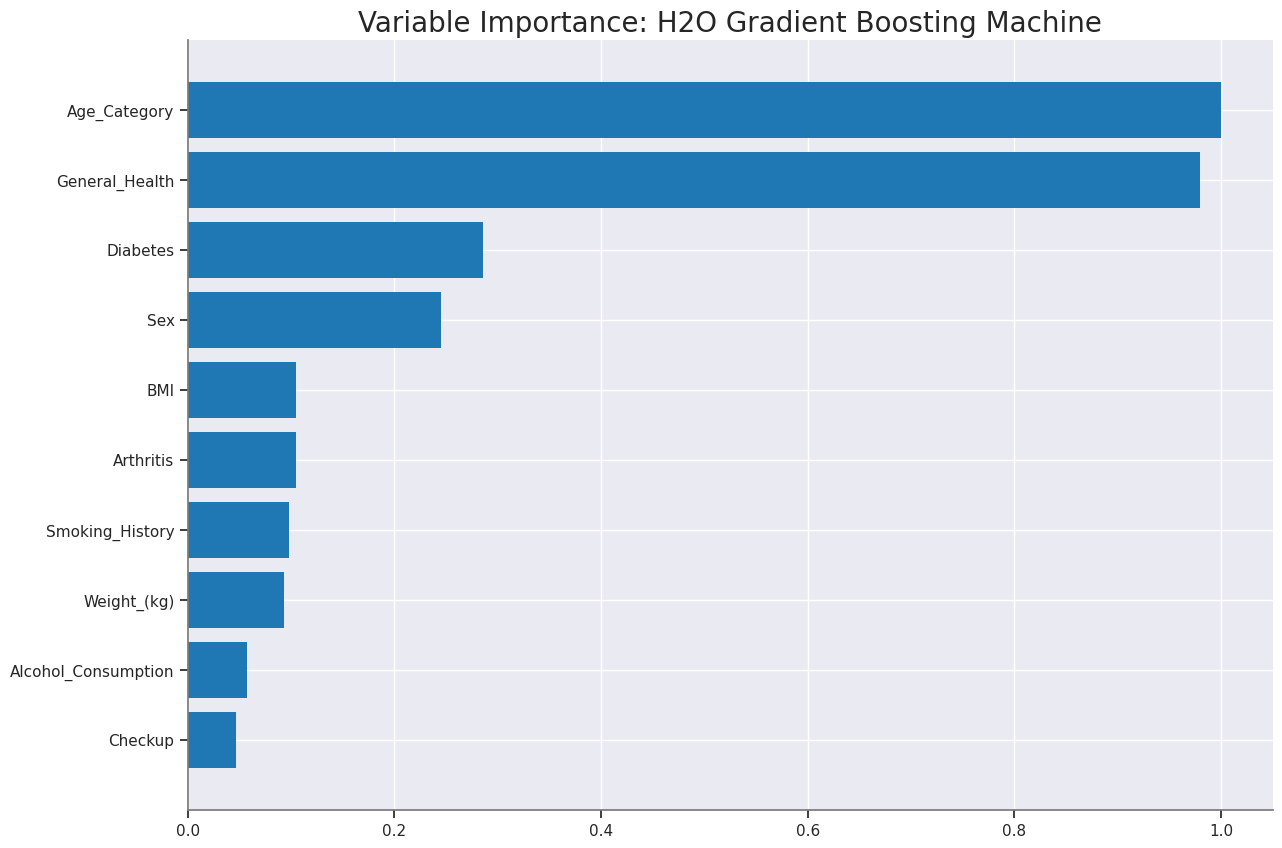

<Figure size 1600x800 with 0 Axes>

In [ ]:
if best_model.algo in [
    "gbm",
    "drf",
    "xrt",
    "xgboost",
]:  # Importance of all the variables in GBM algorithm.
    best_model.varimp_plot()

<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-192-0cab54a0793b>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if glm_index is not 0:


20
glm


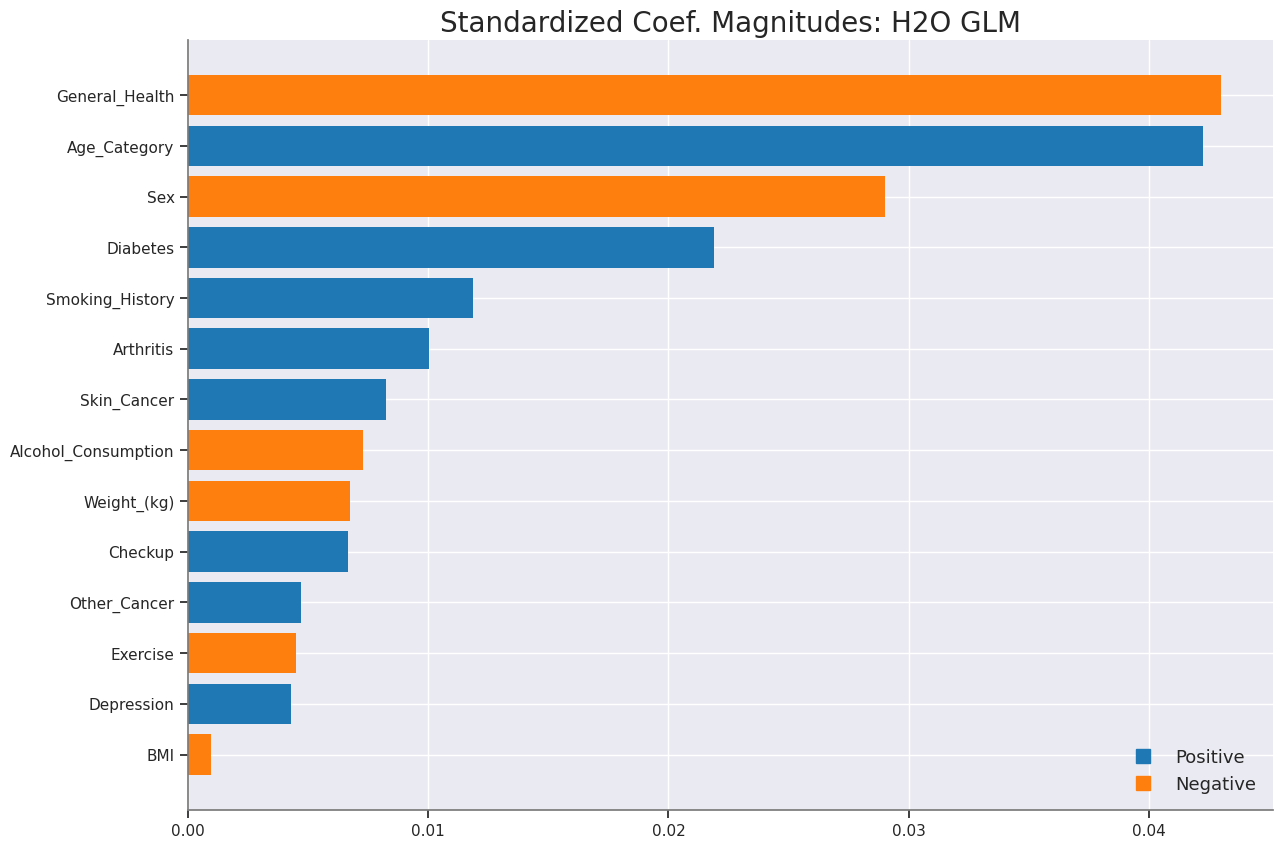

In [ ]:
if glm_index is not 0:
    print(glm_index)
    glm_model = h2o.get_model(aml.leaderboard[glm_index, "model_id"])
    print(glm_model.algo)
    glm_model.std_coef_plot()

In [ ]:
print(best_model.rmse(train=True))

0.24902711469877475


In [ ]:
mod_perf = best_model.model_performance(df1_test)
stats_test = {}
stats_test = model_performance_stats(mod_perf)
stats_test

{'mse': 0.06482319865912357,
 'rmse': 0.2546040036195888,
 'null_degrees_of_freedom': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'null_deviance': None}

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

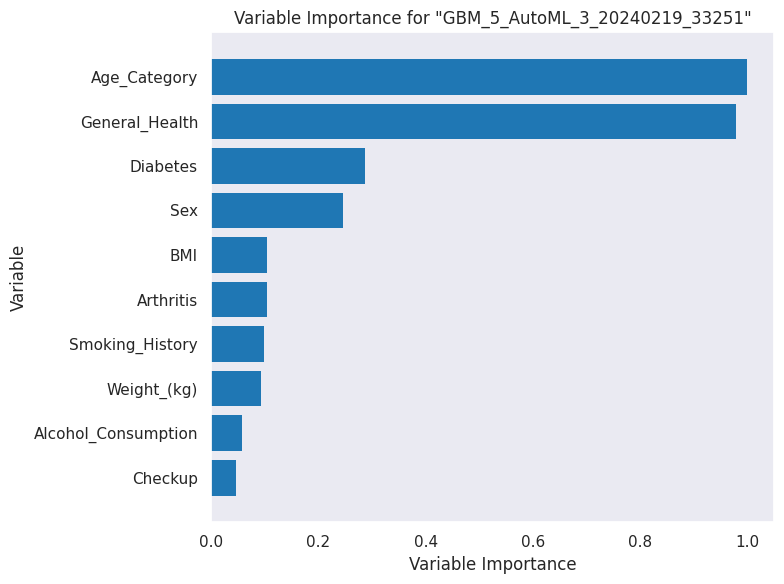

In [ ]:
explain_model = aml.explain(frame = df1_test, figsize = (8,6),include_explanations=['varimp'])

**Regularization**

In [ ]:
from sklearn.model_selection import  train_test_split
X = df[['Diabetes', 'Checkup','BMI'
       ,  'Sex', 'Age_Category',  'Weight_(kg)','General_Health','Smoking_History','Alcohol_Consumption']]

y = df['Heart_Disease']

#Spliting data into Training 70%, Test set 30%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [152]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
# rmse after regularization
y_pred = ridge.predict(X_test)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

0.25683494687446273

In [ ]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(df['Heart_Disease'], df[['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History', 'Alcohol_Consumption']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Heart_Disease   R-squared (uncentered):                   0.184
Model:                            OLS   Adj. R-squared (uncentered):              0.184
Method:                 Least Squares   F-statistic:                              4630.
Date:                Mon, 19 Feb 2024   Prob (F-statistic):                        0.00
Time:                        03:46:44   Log-Likelihood:                         -18511.
No. Observations:              308854   AIC:                                  3.705e+04
Df Residuals:                  308839   BIC:                                  3.721e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
General_Health         -0.0418      0.001    -81.255      0.000      -0.043      -0.041
Checkup                 0.0067      0.000     14.299      0.000       0.006       0.008
Exercise               -0.0111      0.001     -9.520      0.000      -0.013      -0.009
Skin_Cancer             0.0247      0.002     15.084      0.000       0.021       0.028
Other_Cancer            0.0155      0.002      9.508      0.000       0.012       0.019
Depression              0.0109      0.001      8.927      0.000       0.009       0.013
Diabetes                0.0310      0.001     45.455      0.000       0.030       0.032
Arthritis               0.0213      0.001     19.217      0.000       0.019       0.023
Sex                    -0.0568      0.001    -44.829      0.000      -0.059      -0.054
Age_Category            0.0121      0.000     77.183      0.000       0.012       0.012
Height_(cm)             0.0010   2.21e-05     45.155      0.000       0.001       0.001
Weight_(kg)            -0.0013   6.38e-05    -20.332      0.000      -0.001      -0.001
BMI                     0.0026      0.000     14.334      0.000       0.002       0.003
Smoking_History         0.0241      0.001     24.590      0.000       0.022       0.026
Alcohol_Consumption    -0.0009   5.82e-05    -15.188      0.000      -0.001      -0.001
==============================================================================
Omnibus:                   155875.313   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           766232.607
Skew:                           2.546   Prob(JB):                         0.00
Kurtosis:                       8.798   Cond. No.                         713.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# the independent variables set
independent = df[['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History', 'Alcohol_Consumption']]

In [ ]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = independent.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(independent.values, i)
                          for i in range(len(independent.columns))]

print(vif_data)

                feature         VIF
0        General_Health   16.739468
1               Checkup   13.886812
2              Exercise    4.956928
3           Skin_Cancer    1.215838
4          Other_Cancer    1.199942
5            Depression    1.403818
6              Diabetes    1.352918
7             Arthritis    1.883682
8                   Sex    3.893288
9          Age_Category    6.289979
10          Height_(cm)   66.936840
11          Weight_(kg)  141.806739
12                  BMI  131.523995
13      Smoking_History    1.815969
14  Alcohol_Consumption    1.479209


<Axes: >

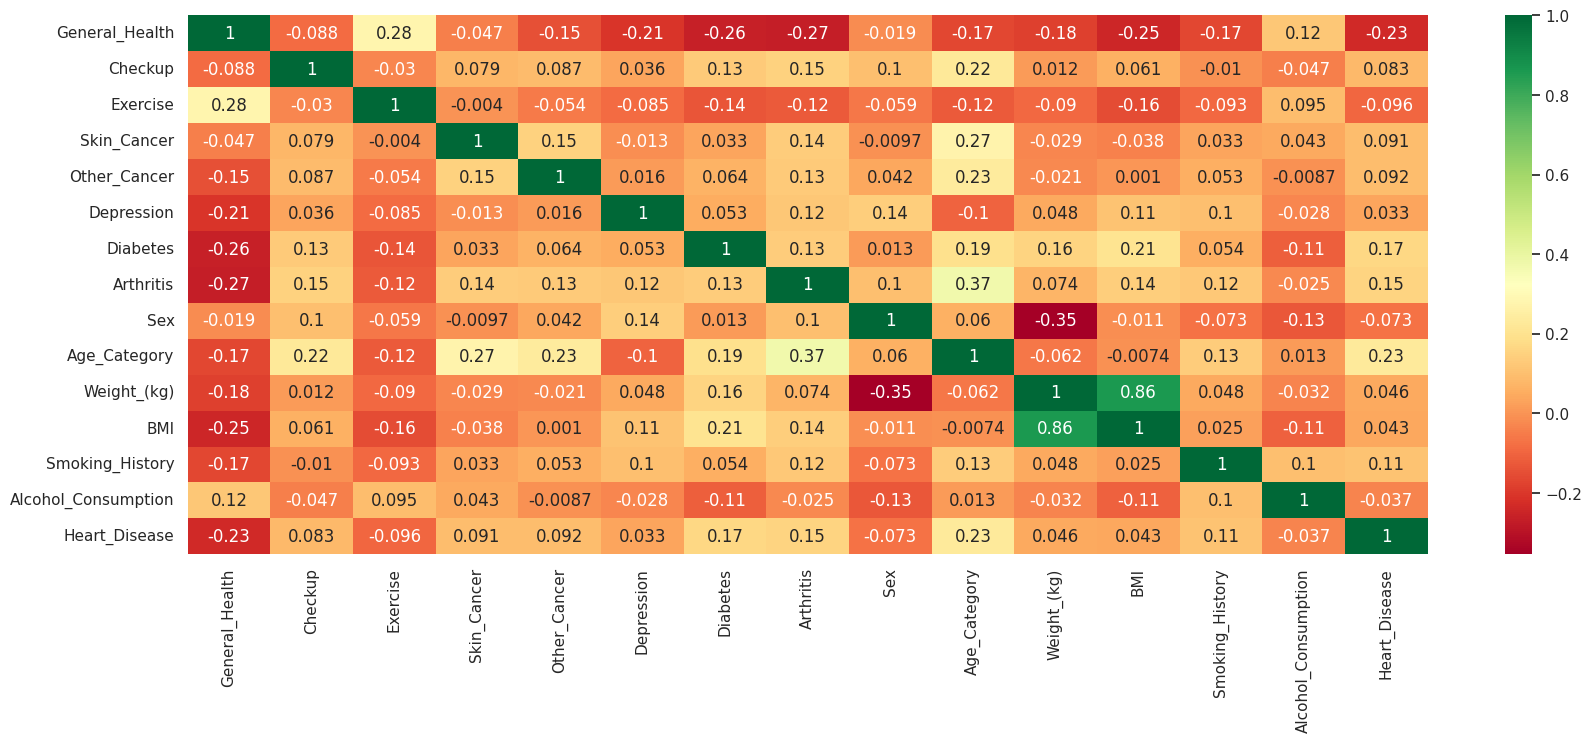

In [ ]:
plt.figure(figsize=(20,7))
sns.heatmap(df1.corr(), annot=True, cmap='RdYlGn')

**Is the relationship significant?**

Yes, because the R-sqaured is 0.184 which is very high and all features' p value is 0, so the relationship is very much significant

**Are any model assumptions violated?**

No, the dependent variable is 0/1, so the question is a classification question which make sense to all models in AutoML.

**Is there any multicollinearity in the model?**

Yes, from the VIF data, we could know that variables have more or less correlationship with each other, specially weight and BMI relationship as we can see.

**In the multivariate models are predictor variables independent of all the other predictor variables?**

 No,they aren't all independent of each other as seen in the correlation heap map.
1.features like Weight and BMI have a strong correlation with each other


**In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**

The most significant predictor variable is the General health and age, and checkup is the most insiginificant one.

**Does the model make sense?**

Yes, the qusetion is a classification question and models in AutoML can deal with it.

**Does regularization help?**

No, the rmse from the best model is 0.25, and in regularization, the rmse is also 0.25

**Which independent variables are significant?**
The most significant predictor variable is General health and Age Category

**Which hyperparameters are important?**

all hyperparameters are important because they determined the way model works, however, there are some more important one, such as learn_rate, max_depth,sample_rate,col_sample_rate.

**Coding professionalism?**
Yes.

**Multiclassification(using all other variables to classificate BMI which will be classified in categories to 1,2,3)**

It can be integrated into creating multivariate models when dealing with multiple dependent or independent variables in predictive modeling or statistical analysis.

In [ ]:
file_path = "/content/CVD_cleaned.csv"
df = pd.read_csv(file_path)

In [ ]:
df.head()

General_Health                  Checkup Exercise Heart_Disease Skin_Cancer  \
0           Poor  Within the past 2 years       No            No          No   
1      Very Good     Within the past year       No           Yes          No   
2      Very Good     Within the past year      Yes            No          No   
3           Poor     Within the past year      Yes           Yes          No   
4           Good     Within the past year       No            No          No   

  Other_Cancer Depression Diabetes Arthritis     Sex Age_Category  \
0           No         No       No       Yes  Female        70-74   
1           No         No      Yes        No  Female        70-74   
2           No         No      Yes        No  Female        60-64   
3           No         No      Yes        No    Male        75-79   
4           No         No       No        No    Male          80+   

   Height_(cm)  Weight_(kg)    BMI Smoking_History  Alcohol_Consumption  \
0        150.0        32.66  14.54             Yes                  0.0   
1        165.0        77.11  28.29              No                  0.0   
2        163.0        88.45  33.47              No                  4.0   
3        180.0        93.44  28.73              No                  0.0   
4        191.0        88.45  24.37             Yes                  0.0   

   Fruit_Consumption  Green_Vegetables_Consumption  FriedPotato_Consumption  
0               30.0                          16.0                     12.0  
1               30.0                           0.0                      4.0  
2               12.0                           3.0                     16.0  
3               30.0                          30.0                      8.0  
4                8.0                           4.0                      0.0

In [ ]:
df['Heart_Disease'] = df['Heart_Disease'].map({'No': 0, 'Yes': 1})
df['General_Health'] = df['General_Health'].map({'Poor': 1, 'Fair': 2,'Good': 3,'Very Good': 4,'Excellent': 5})
df['Exercise'] = df['Exercise'].map({'No': 0, 'Yes': 1})
df['Skin_Cancer'] = df['Skin_Cancer'].map({'No': 0, 'Yes': 1})
df['Other_Cancer'] = df['Other_Cancer'].map({'No': 0, 'Yes': 1})
df['Arthritis'] = df['Arthritis'].map({'No': 0, 'Yes': 1})
df['Sex'] = df['Sex'].map({'Male': 0, 'Female': 1})
df['Depression'] = df['Depression'].map({'No': 0, 'Yes': 1})
df['Smoking_History'] = df['Smoking_History'].map({'No': 0, 'Yes': 1})
df['Age_Category'] = df['Age_Category'].astype("category").cat.codes
df['Checkup'] = df['Checkup'].astype("category").cat.codes
df['Diabetes'] = df['Diabetes'].astype("category").cat.codes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  int64  
 1   Checkup                       308854 non-null  int8   
 2   Exercise                      308854 non-null  int64  
 3   Heart_Disease                 308854 non-null  int64  
 4   Skin_Cancer                   308854 non-null  int64  
 5   Other_Cancer                  308854 non-null  int64  
 6   Depression                    308854 non-null  int64  
 7   Diabetes                      308854 non-null  int8   
 8   Arthritis                     308854 non-null  int64  
 9   Sex                           308854 non-null  int64  
 10  Age_Category                  308854 non-null  int8   
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [ ]:
for i in df.index:
    if df.loc[i,'BMI'] >= 30:
        df.at[i,'BMI'] = 3
    elif df.loc[i,'BMI'] >= 20:
        df.at[i,'BMI'] = 2
    elif df.loc[i,'BMI'] >= 10:
        df.at[i,'BMI'] = 1
    else:
        df.at[i,'BMI'] = 0

In [ ]:
set(df['BMI'])

{1.0, 2.0, 3.0}

In [ ]:
df.corr()

General_Health   Checkup  Exercise  \
General_Health                      1.000000 -0.088348  0.276096   
Checkup                            -0.088348  1.000000 -0.029750   
Exercise                            0.276096 -0.029750  1.000000   
Heart_Disease                      -0.232503  0.083480 -0.096347   
Skin_Cancer                        -0.047113  0.079285 -0.003986   
Other_Cancer                       -0.145640  0.086747 -0.054388   
Depression                         -0.207587  0.035632 -0.084729   
Diabetes                           -0.262828  0.127812 -0.136618   
Arthritis                          -0.265957  0.150166 -0.124813   
Sex                                -0.018969  0.100058 -0.059344   
Age_Category                       -0.167344  0.223067 -0.122345   
Height_(cm)                         0.066942 -0.088958  0.091618   
Weight_(kg)                        -0.184238  0.012007 -0.090144   
BMI                                -0.196993  0.055735 -0.119681   
Smoking_History                    -0.167608 -0.010145 -0.093295   
Alcohol_Consumption                 0.118227 -0.046676  0.094959   
Fruit_Consumption                   0.102615  0.039310  0.136787   
Green_Vegetables_Consumption        0.119776  0.034934  0.125002   
FriedPotato_Consumption            -0.031859 -0.055723 -0.036930   

                              Heart_Disease  Skin_Cancer  Other_Cancer  \
General_Health                    -0.232503    -0.047113     -0.145640   
Checkup                            0.083480     0.079285      0.086747   
Exercise                          -0.096347    -0.003986     -0.054388   
Heart_Disease                      1.000000     0.090848      0.092387   
Skin_Cancer                        0.090848     1.000000      0.150824   
Other_Cancer                       0.092387     0.150824      1.000000   
Depression                         0.032526    -0.013014      0.015892   
Diabetes                           0.166241     0.032968      0.063898   
Arthritis                          0.153913     0.136178      0.129362   
Sex                               -0.072595    -0.009678      0.042044   
Age_Category                       0.229011     0.272074      0.234459   
Height_(cm)                        0.015780     0.006812     -0.043459   
Weight_(kg)                        0.045875    -0.028954     -0.021132   
BMI                                0.040297    -0.028507      0.000497   
Smoking_History                    0.107797     0.032828      0.053431   
Alcohol_Consumption               -0.036569     0.042764     -0.008663   
Fruit_Consumption                 -0.020055     0.024123      0.007974   
Green_Vegetables_Consumption      -0.024043     0.012871     -0.003237   
FriedPotato_Consumption           -0.009227    -0.038919     -0.033298   

                              Depression  Diabetes  Arthritis       Sex  \
General_Health                 -0.207587 -0.262828  -0.265957 -0.018969   
Checkup                         0.035632  0.127812   0.150166  0.100058   
Exercise                       -0.084729 -0.136618  -0.124813 -0.059344   
Heart_Disease                   0.032526  0.166241   0.153913 -0.072595   
Skin_Cancer                    -0.013014  0.032968   0.136178 -0.009678   
Other_Cancer                    0.015892  0.063898   0.129362  0.042044   
Depression                      1.000000  0.053155   0.121598  0.141450   
Diabetes                        0.053155  1.000000   0.133890  0.013143   
Arthritis                       0.121598  0.133890   1.000000  0.100053   
Sex                             0.141450  0.013143   0.100053  1.000000   
Age_Category                   -0.103169  0.192792   0.370997  0.060232   
Height_(cm)                    -0.091318 -0.043098  -0.097789 -0.698167   
Weight_(kg)                     0.047936  0.158219   0.074104 -0.354019   
BMI                             0.080954  0.176773   0.118114 -0.022514   
Smoking_History                 0.100275  0.053780   0.123196 -

<Axes: >

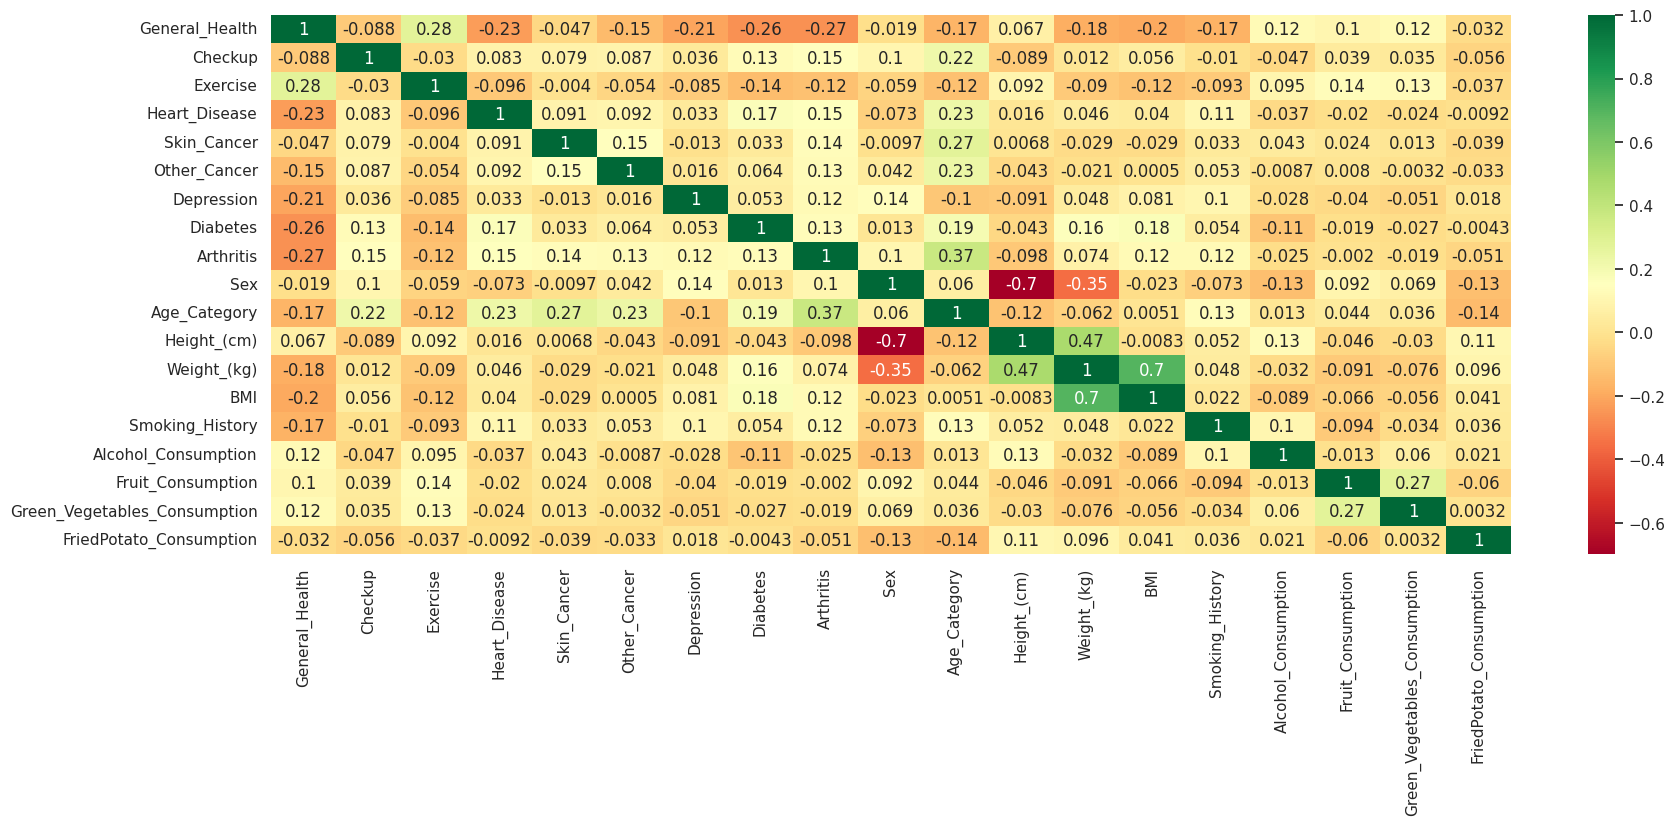

In [ ]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

In [ ]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(df['BMI'], df[['Diabetes', 'Checkup', 'Exercise', 'Heart_Disease',
       'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Sex', 'Age_Category', 'Height_(cm)', 'Weight_(kg)','General_Health','Smoking_History','Alcohol_Consumption','Fruit_Consumption','Green_Vegetables_Consumption','FriedPotato_Consumption']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    BMI   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                          6.868e+05
Date:                Mon, 19 Feb 2024   Prob (F-statistic):                        0.00
Time:                        23:41:02   Log-Likelihood:                     -1.2989e+05
No. Observations:              308854   AIC:                                  2.598e+05
Df Residuals:                  308836   BIC:                                  2.600e+05
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Diabetes                         0.0250      0.001     25.460      0.000       0.023       0.027
Checkup                          0.0251      0.001     37.420      0.000       0.024       0.026
Exercise                         0.0079      0.002      4.654      0.000       0.005       0.011
Heart_Disease                    0.0226      0.003      8.778      0.000       0.018       0.028
Skin_Cancer                     -0.0301      0.002    -12.818      0.000      -0.035      -0.025
Other_Cancer                    -0.0053      0.002     -2.282      0.022      -0.010      -0.001
Depression                       0.0192      0.002     10.927      0.000       0.016       0.023
Arthritis                        0.0163      0.002     10.223      0.000       0.013       0.019
Sex                              0.3132      0.001    220.840      0.000       0.310       0.316
Age_Category                     0.0087      0.000     38.535      0.000       0.008       0.009
Height_(cm)                      0.0005   3.18e-05     16.559      0.000       0.000       0.001
Weight_(kg)                      0.0215   3.71e-05    579.359      0.000       0.021       0.022
General_Health                   0.0217      0.001     29.169      0.000       0.020       0.023
Smoking_History                  0.0090      0.001      6.408      0.000       0.006       0.012
Alcohol_Consumption             -0.0011   8.36e-05    -13.325      0.000      -0.001      -0.001
Fruit_Consumption               -0.0001   2.82e-05     -4.544      0.000      -0.000   -7.28e-05
Green_Vegetables_Consumption -9.452e-05   4.67e-05     -2.023      0.043      -0.000   -2.94e-06
FriedPotato_Consumption          0.0011    7.9e-05     13.842      0.000       0.001       0.001
==============================================================================
Omnibus:                     9350.549   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19631.994
Skew:                          -0.197   Prob(JB):                         0.00
Kurtosis:                       4.171   Cond. No.                         759.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
df = df[['Diabetes', 'Checkup', 'Exercise', 'Heart_Disease',
       'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Sex', 'Age_Category', 'Height_(cm)', 'Weight_(kg)','BMI','Smoking_History','Alcohol_Consumption','Fruit_Consumption','Green_Vegetables_Consumption','FriedPotato_Consumption']].dropna()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['Diabetes', 'Checkup', 'Exercise', 'Heart_Disease',
       'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Sex', 'Age_Category', 'Height_(cm)', 'Weight_(kg)','General_Health','Smoking_History','Alcohol_Consumption','Fruit_Consumption','Green_Vegetables_Consumption','FriedPotato_Consumption']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

                         feature        VIF
0                       Diabetes   1.356743
1                        Checkup  13.714818
2                       Exercise   5.060964
3                  Heart_Disease   1.224095
4                    Skin_Cancer   1.214768
5                   Other_Cancer   1.200334
6                     Depression   1.401261
7                      Arthritis   1.885413
8                            Sex   2.373167
9                   Age_Category   6.441907
10                   Height_(cm)  67.305166
11                   Weight_(kg)  23.256943
12                General_Health  17.087408
13               Smoking_History   1.829226
14           Alcohol_Consumption   1.483279
15             Fruit_Consumption   2.721378
16  Green_Vegetables_Consumption   2.240670
17       FriedPotato_Consumption   1.608473


In [ ]:
from sklearn.model_selection import  train_test_split
X = df[['Diabetes', 'Checkup', 'Exercise', 'Heart_Disease',
       'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Sex', 'Age_Category', 'Height_(cm)', 'Weight_(kg)','General_Health','Smoking_History','Alcohol_Consumption','Fruit_Consumption','Green_Vegetables_Consumption','FriedPotato_Consumption']]

y = df['BMI']

#Spliting data into Training 70%, Test set 30%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
# rmse after regularization
y_pred = ridge.predict(X_test)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

0.32764086097325484

In [ ]:
df.head()

General_Health  Checkup  Exercise  Heart_Disease  Skin_Cancer  \
0               1        2         0              0            0   
1               4        4         0              1            0   
2               4        4         1              0            0   
3               1        4         1              1            0   
4               3        4         0              0            0   

   Other_Cancer  Depression  Diabetes  Arthritis  Sex  Age_Category  \
0             0           0         0          1    1            10   
1             0           0         2          0    1            10   
2             0           0         2          0    1             8   
3             0           0         2          0    0            11   
4             0           0         0          0    0            12   

   Height_(cm)  Weight_(kg)  BMI  Smoking_History  Alcohol_Consumption  \
0        150.0        32.66  1.0                1                  0.0   
1        165.0        77.11  2.0                0                  0.0   
2        163.0        88.45  3.0                0                  4.0   
3        180.0        93.44  2.0                0                  0.0   
4        191.0        88.45  2.0                1                  0.0   

   Fruit_Consumption  Green_Vegetables_Consumption  FriedPotato_Consumption  
0               30.0                          16.0                     12.0  
1               30.0                           0.0                      4.0  
2               12.0                           3.0                     16.0  
3               30.0                          30.0                      8.0  
4                8.0                           4.0                      0.0

In [ ]:
df = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
df

General_Health    Checkup    Exercise    Heart_Disease    Skin_Cancer    Other_Cancer    Depression    Diabetes    Arthritis    Sex    Age_Category    Height_(cm)    Weight_(kg)    BMI    Smoking_History    Alcohol_Consumption    Fruit_Consumption    Green_Vegetables_Consumption    FriedPotato_Consumption
----------------  ---------  ----------  ---------------  -------------  --------------  ------------  ----------  -----------  -----  --------------  -------------  -------------  -----  -----------------  ---------------------  -------------------  ------------------------------  -------------------------
               1          2           0                0              0               0             0           0            1      1              10            150          32.66      1                  1                      0                   30                              16                         12
               4          4           0                1              0               0             0           2            0      1              10            165          77.11      2                  0                      0                   30                               0                          4
               4          4           1                0              0               0             0           2            0      1               8            163          88.45      3                  0                      4                   12                               3                         16
               1          4           1                1              0               0             0           2            0      0              11            180          93.44      2                  0                      0                   30                              30                          8
               3          4           0                0              0               0             0           0            0      0              12            191          88.45      2                  1                      0                    8                               4                          0
               3          4           0                0              0               0             1           0            1      0               8            183         154.22      3                  0                      0                   12                              12                         12
               2          4           1                1              0               0             0           0            1      0               8            175          69.85      2                  1                      0                   16                               8                          0
               3          4           1                0              0               0             0           0            1      1               9            165         108.86      3                  1                      3                   30                               8                          8
               2          4           0                0              0               0             1           0            0      1               9            163          72.57      2                  1                      0                   12                              12                          4
               2          4           0                0              0               0             0           2            1      1              10            163          91.63      3                  0                      0                   12                              12                          1
[308854 rows x 19 columns]

In [ ]:
train, test = df.split_frame(seed = 1234, destination_frames = ["train.hex", "test.hex"])

In [ ]:
train["is_train"] = 1
test["is_train"] = 0

drift_data = train.rbind(test)
drift_data["is_train"] = drift_data["is_train"].asfactor()

In [ ]:

drift_data["is_train"].table()

is_train    Count
----------  -------
         0    77097
         1   231757
[2 rows x 2 columns]

In [ ]:
x = list(set(train.col_names) - set(["BMI"]))

In [ ]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)


In [ ]:

aml.train(x=x, y="BMI", training_frame=train)

AutoML progress: |
22:08:23.711: _train param, Dropping bad and constant columns: [is_train]

███████████████████
22:09:31.145: _train param, Dropping bad and constant columns: [is_train]

█
22:09:32.349: _train param, Dropping bad and constant columns: [is_train]

████████████████████████████
22:11:14.676: _train param, Dropping unused columns: [is_train]

█████
22:11:30.384: _train param, Dropping bad and constant columns: [is_train]

█
22:11:36.607: _train param, Dropping bad and constant columns: [is_train]

██
22:11:42.245: _train param, Dropping bad and constant columns: [is_train]

██
22:11:47.693: _train param, Dropping bad and constant columns: [is_train]

█
22:11:52.954: _train param, Dropping bad and constant columns: [is_train]

█
22:11:58.187: _train param, Dropping unused columns: [is_train]

███| (done) 100%

22:12:04.532: _train param, Dropping unused columns: [is_train]



Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_9_20240219_220823


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  --------
Stacking strategy                     blending
Number of base models (used / total)  3/8
# GBM base models (used / total)      1/4
# XGBoost base models (used / total)  2/2
# DRF base models (used / total)      0/1
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    AUTO
Metalearner nfolds                    0
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.00010104772435777028
RMSE: 0.010052249716246124
MAE: 0.005571782887162409
RMSLE: 0.003299096456409218
Mean Residual Deviance: 0.00010104772435777028
R^2: 0.999650779892024
Null degrees of freedom: 10001
Residual degrees of freedom: 9998
Null deviance: 2894.582812985148
Residual deviance: 1.0106793390264184
AIC: -63623.129760351505

ModelMetricsRegressionGLM: stackedensemble
** Reported on validation data. **

MSE: 0.0004699020643951723
RMSE: 0.021677224554706543
MAE: 0.008385999548370405
RMSLE: 0.007824928480029645
Mean Residual Deviance: 0.0004699020643951723
R^2: 0.9984102474443004
Null degrees of freedom: 23174
Residual degrees of freedom: 23171
Null deviance: 6850.407254335156
Residual deviance: 10.889980342358118
AIC: -111811.90552902452

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [ ]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head()

model_id                                                      rmse          mse         mae       rmsle    mean_residual_deviance
-------------------------------------------------------  ---------  -----------  ----------  ----------  ------------------------
StackedEnsemble_AllModels_1_AutoML_9_20240219_220823     0.0216772  0.000469902  0.008386    0.00782493               0.000469902
StackedEnsemble_BestOfFamily_2_AutoML_9_20240219_220823  0.0217113  0.000471382  0.00839733  0.00783498               0.000471382
StackedEnsemble_BestOfFamily_1_AutoML_9_20240219_220823  0.0217113  0.000471382  0.00839733  0.00783498               0.000471382
XGBoost_1_AutoML_9_20240219_220823                       0.0217837  0.000474531  0.00846035  0.00786327               0.000474531
XGBoost_2_AutoML_9_20240219_220823                       0.0306114  0.000937061  0.0122484   0.0113795                0.000937061
GBM_1_AutoML_9_20240219_220823                           0.0319907  0.00102341   0.0119685   0.0114918                0.00102341
GBM_4_AutoML_9_20240219_220823                           0.0456544  0.00208433   0.0323336   0.0162853                0.00208433
GBM_3_AutoML_9_20240219_220823                           0.061479   0.00377966   0.0356114   0.0225812                0.00377966
GBM_2_AutoML_9_20240219_220823                           0.065625   0.00430664   0.0340868   0.0241686                0.00430664
DRF_1_AutoML_9_20240219_220823                           0.0689933  0.00476008   0.0250693   0.0245336                0.00476008
[10 rows x 6 columns]

In [ ]:
model_index = 0
glm_index = 0
glm_model = ""
aml_leaderboard_df = aml.leaderboard.as_data_frame()
models_dict = {}
for m in aml_leaderboard_df["model_id"]:
    models_dict[m] = model_index
    if "StackedEnsemble" not in m:
        break
    model_index = model_index + 1

for m in aml_leaderboard_df["model_id"]:
    if "GLM" in m:
        models_dict[m] = glm_index
        break
    glm_index = glm_index + 1
models_dict

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


{'StackedEnsemble_AllModels_1_AutoML_9_20240219_220823': 0,
 'StackedEnsemble_BestOfFamily_2_AutoML_9_20240219_220823': 1,
 'StackedEnsemble_BestOfFamily_1_AutoML_9_20240219_220823': 2,
 'XGBoost_1_AutoML_9_20240219_220823': 3,
 'GLM_1_AutoML_9_20240219_220823': 10}

In [ ]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])
best_model.algo

3


'xgboost'

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
import matplotlib.cbook

warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)


<ipython-input-124-a0f01d27643e>:8: MatplotlibDeprecationWarning: mplDeprecation was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use matplotlib.MatplotlibDeprecationWarning instead.
  warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)


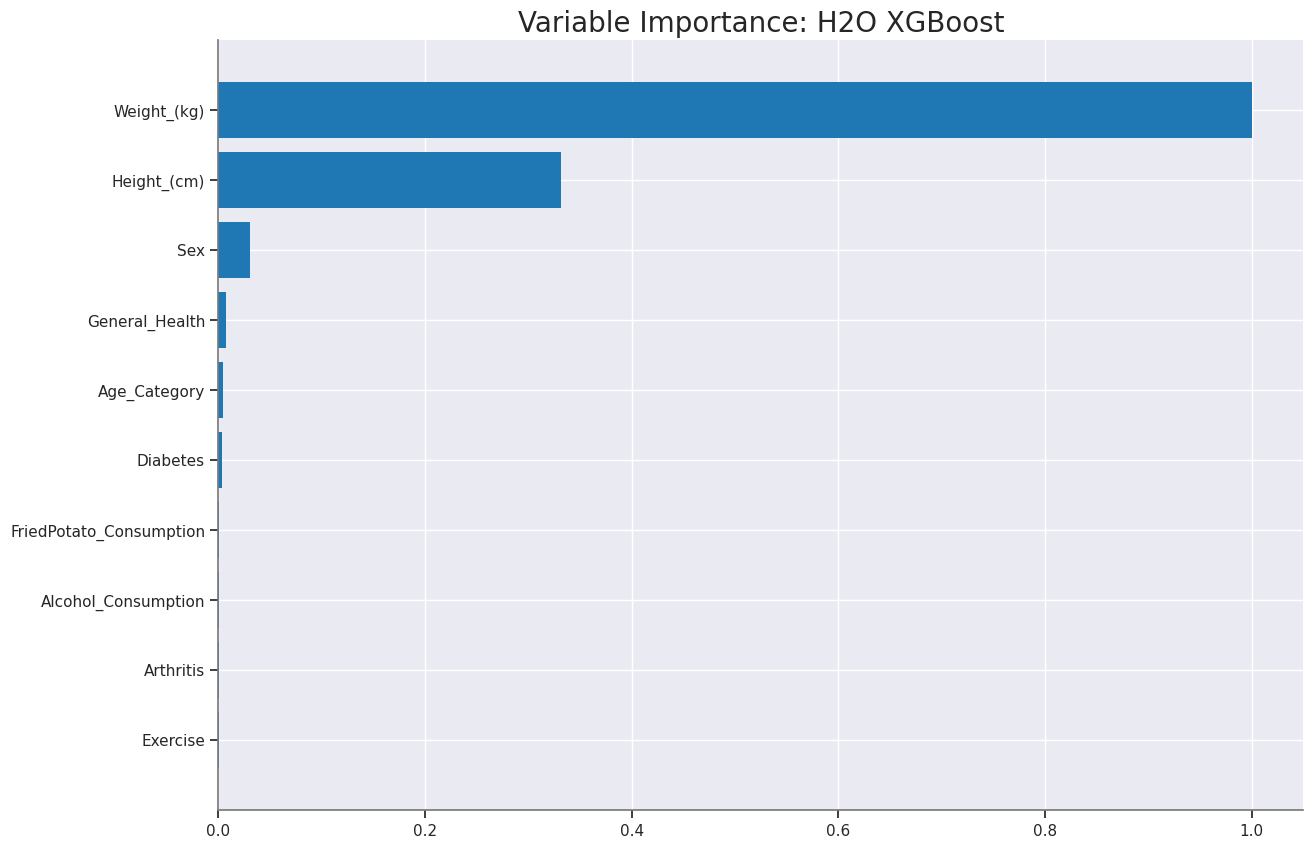

<Figure size 1600x800 with 0 Axes>

In [ ]:

if best_model.algo in [
    "gbm",
    "drf",
    "xrt",
    "xgboost",
]:  # Importance of all the variables in GBM algorithm.
    best_model.varimp_plot()

We see that height and weight are important while considering BMI

In [ ]:
best_model = aml.leader
best_model.model_performance(test)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.0006095679384630826
RMSE: 0.024689429690924063
MAE: 0.008673700270978772
RMSLE: 0.008890224961934808
Mean Residual Deviance: 0.0006095679384630826
R^2: 0.9979167943203916
Null degrees of freedom: 77096
Residual degrees of freedom: 77093
Null deviance: 22559.490715586217
Residual deviance: 46.99585935168828
AIC: -351928.79104622174

**Is the relationship significant?**

 yes, because the R-sqaured is which is very high and all features' p value is 0 except a few of them, so the relationship is very much significant

**Are any model assumptions violated?**

no, the model is a multiclassification which make sense to all models in AutoML.

**Is there any multicollinearity in the model?**

yes, from the VIF data, we could say that variables have correlationship with each other since we can see High VIF.

**In the multivariate models are predictor variables independent of all the other predictor variables?**

No, they are not all independent of each other, we can see that from the correlation heap map.

**In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**

the most significant predictor variable are Height and weight, and Exercise and Arthritis are the most insiginificant one.

**Does the model make sense?**

 yes, the question is a multiclassfication question and models in AutoML can deal with it.

**Does regularization help?**

no, the rmse from the best model is better however, in regularization, the rmse is 0.3

**Which independent variables are significant?**

the most significant predictor variable is Weight


**Coding professionalism?**

yes.

**Classification Report**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Assuming 'X' is your feature matrix and 'y' is your target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9181169157047806
Confusion Matrix:
[[56496   278]
 [ 4780   217]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56774
           1       0.44      0.04      0.08      4997

    accuracy                           0.92     61771
   macro avg       0.68      0.52      0.52     61771
weighted avg       0.88      0.92      0.89     61771



1.An accuracy of 0.9184 means that the model correctly predicted the class of
approximately 91.84% of the instances in the dataset.

2.confusion matrix:
There are 56,507 true negative (TN) instances (predicted negative and actually negative).
There are 267 false positive (FP) instances (predicted positive but actually negative).
There are 4,776 false negative (FN) instances (predicted negative but actually positive).
There are 221 true positive (TP) instances (predicted positive and actually positive).
Confusion matrix along with accuracy gives a more detailed understanding of how well the model is performing, particularly in terms of its ability to correctly classify instances belonging to different classes.


3.The F1-score for class 0 is high (0.96), indicating good performance in classifying negative instances

4.Precision for class 0 (negative class) is high (0.92), indicating that the model correctly identifies a large proportion of true negatives among all instances predicted as negative

5.The overall accuracy of the model is high (0.92), which may be misleading due to the class imbalance (a large number of instances belong to class 0).

**Conclusion**

In this assignment, we employed H2O.ai AutoML to build predictive models, observed picking up two GBM and one XGBoost model due to their effectiveness. Through rigorous evaluation, we identified significant features, highlighting the efficiency of AutoML in developing robust multivariate models for predictive analytics.

**References:**

https://docs.h2o.ai/h2o/latest-stable/h2o-docs/grid-search.html

W3 schools

H2o autoML - https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html